In [1]:
import pandas as pd

# Cargar el archivo CSV
datos = pd.read_csv('gemini_embeddings.csv')

# Mostrar las primeras filas del DataFrame para verificar que se haya cargado correctamente
print(datos.head())

          0         1         2         3         4         5         6  \
0  0.004834 -0.007669 -0.056453  0.047312  0.056414  0.020395 -0.006383   
1 -0.003273  0.015776 -0.082300  0.018346  0.048940  0.065487  0.028114   
2  0.031425  0.000970 -0.047132 -0.008093  0.050860  0.004038  0.009206   
3  0.002930 -0.024204 -0.017667  0.005742  0.061787  0.029550  0.029773   
4  0.030222 -0.048901 -0.030433  0.034297  0.047656 -0.000250  0.005733   

          7         8         9  ...       759       760       761       762  \
0  0.005240 -0.006709  0.036741  ...  0.024213 -0.021738  0.042469 -0.026355   
1 -0.035430  0.025022  0.004832  ...  0.048059 -0.016469  0.023373  0.007409   
2  0.007279  0.024111  0.007766  ...  0.046715 -0.032323  0.036067  0.021125   
3 -0.009260  0.018311 -0.001870  ... -0.013458 -0.016808  0.026444  0.020729   
4 -0.010424 -0.007632 -0.024980  ... -0.019412 -0.010516  0.044939 -0.031248   

        763       764       765       766       767      cat_one_hot

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from joblib import dump
import pickle
from sklearn.svm import SVC
import os
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_predict
import matplotlib.pyplot as plt
import seaborn as sns
import os
import pickle

def crear_directorio(nombre_carpeta):
    directorio_actual = os.getcwd()
    print("El directorio actual es:", directorio_actual)
    ruta_nueva_carpeta = os.path.join(directorio_actual, nombre_carpeta)
    # Verificar si la carpeta ya existe
    if not os.path.exists(ruta_nueva_carpeta):
        # Crear la carpeta si no existe
        os.mkdir(ruta_nueva_carpeta)
        print("Se creó la carpeta", nombre_carpeta, "en", directorio_actual)
    else:
        print("La carpeta", nombre_carpeta, "ya existe en", directorio_actual)

    ruta_modificada = ruta_nueva_carpeta.replace("\\","/")
    return ruta_modificada

In [3]:
def knn_classification(dataset,n_neighbors,test_size_1=None, cv=None):
    # Separar las características (X) de las etiquetas (y)
    validacion = ""
    X = dataset.drop('cat_one_hot', axis=1)  # Eliminar la columna 'cat_one_hot' para obtener las características
    y = dataset['cat_one_hot']  # Obtener solo la columna 'cat_one_hot' para obtener las etiquetas

    if test_size_1:
        # Dividir el conjunto de datos en conjunto de entrenamiento y conjunto de prueba
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size_1, random_state=42)
        
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Entrenar el modelo de regresión logística
        modelo_knn.fit(X_train, y_train)
        
        # Hacer predicciones con el modelo entrenado
        predicciones = modelo_knn.predict(X_test)
        
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y_test, predicciones)
        precision = precision_score(y_test, predicciones, average='weighted')
        recall = recall_score(y_test, predicciones, average='weighted')
        f1 = f1_score(y_test, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y_test, predicciones)
        
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con test = ' + str(test_size_1))
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')
    
        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_gemini_embeddings_val_simple_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_test_" + str(test_size_1) +  ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud del modelo:", exactitud)
        print("Precisión del modelo:", precision)
        print("Recall del modelo:", recall)
        print("Puntuación F1 del modelo:", f1)
    
        resultados = {}
        resultados["exactitud"] = exactitud
        resultados["precision"] = precision
        resultados["recall"] = recall
        resultados["f1"] = f1
        #resultados["matriz_confusion"] = matriz_confusion
        validacion = "simple"
        ruta_para_modelo = ruta_figura_incom + "/KNN_gemini_embeddings_val_test" + str(test_size_1) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)

    elif cv:
        # Inicializar el modelo de regresión logística para clasificación multiclase
        modelo_knn = KNeighborsClassifier(n_neighbors=n_neighbors)
        
        # Realizar validación cruzada
        predicciones = cross_val_predict(modelo_knn, X, y, cv=cv)
        # Evaluar el rendimiento del modelo
        exactitud = accuracy_score(y, predicciones)
        precision = precision_score(y, predicciones, average='weighted')
        recall = recall_score(y, predicciones, average='weighted')
        f1 = f1_score(y, predicciones, average='weighted')
        matriz_confusion = confusion_matrix(y, predicciones)
         
        # Crear un mapa de calor para la matriz de confusión
        plt.figure(figsize=(8, 6))
        sns.heatmap(matriz_confusion, annot=True, fmt="d", cmap="Blues")
        plt.title('Matriz de Confusión con Validación Cruzada (cv = ' + str(cv) + ')')
        plt.xlabel('Etiquetas Predichas')
        plt.ylabel('Etiquetas Verdaderas')

        # Guardar la figura de la matriz de confusión
        ruta_figura_incom = crear_directorio("KNN_gemini_embeddings_val_cruz_" + str(n_neighbors) + "_vecinos")
        ruta_figura = ruta_figura_incom + "/matriz_confusion_cv_" + str(cv) + ".png"
        plt.savefig(ruta_figura)
        print("Matriz de confusión guardada en:", ruta_figura)
        plt.show()
        
        print("Exactitud media:", exactitud)
        print("Precisión media:", precision)
        print("Recall media:", recall)
        print("Puntuación F1 media:", f1)

        resultados = {}
        resultados["exactitud_media"] = exactitud
        resultados["precision_media"] = precision
        resultados["recall_media"] = recall
        resultados["f1_media"] = f1
        validacion = "cruz"
        ruta_para_modelo = ruta_figura_incom + "/KNN_gemini_embeddings_val_cruz" + str(cv) + ".pkl"
        with open(ruta_para_modelo, 'wb') as archivo:
            pickle.dump(modelo_knn, archivo)
    else:
        print("Por favor, proporciona el tamaño de prueba (test_size_1) o el número de pliegues de validación cruzada (cv).")
        resultados = None
    
    return resultados,validacion,ruta_figura_incom

C:\Users\David Soto\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_simple_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.1.png


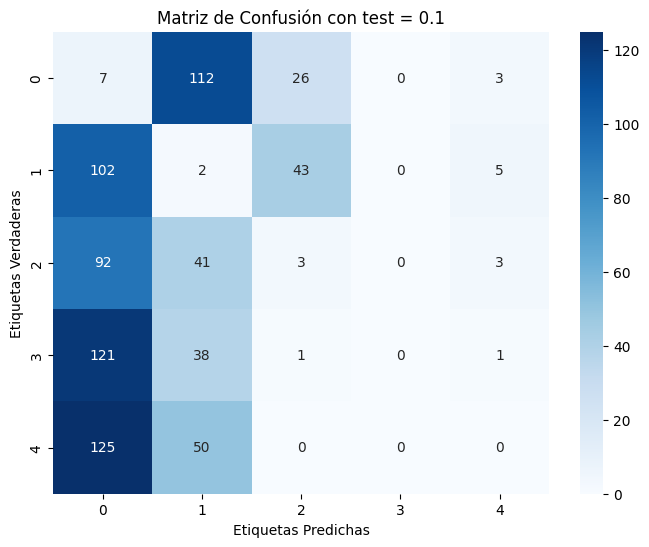

Exactitud del modelo: 0.015483870967741935
Precisión del modelo: 0.011975523808753177
Recall del modelo: 0.015483870967741935
Puntuación F1 del modelo: 0.011555555756976164
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.2.png


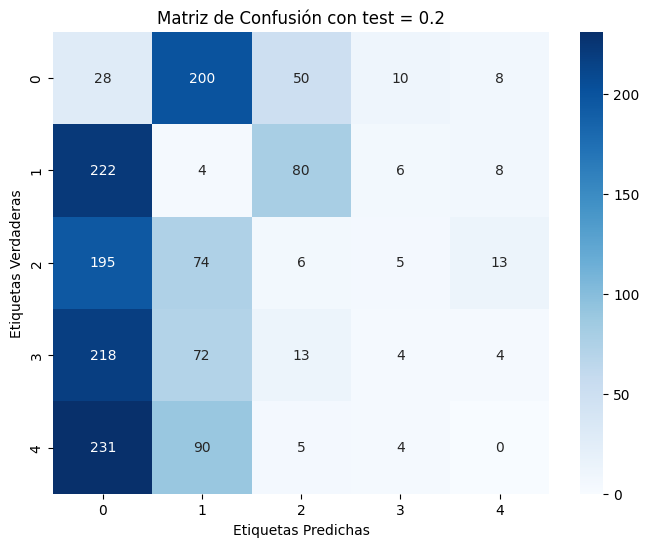

Exactitud del modelo: 0.027096774193548386
Precisión del modelo: 0.042898013265237095
Recall del modelo: 0.027096774193548386
Puntuación F1 del modelo: 0.020955646250478407
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.3.png


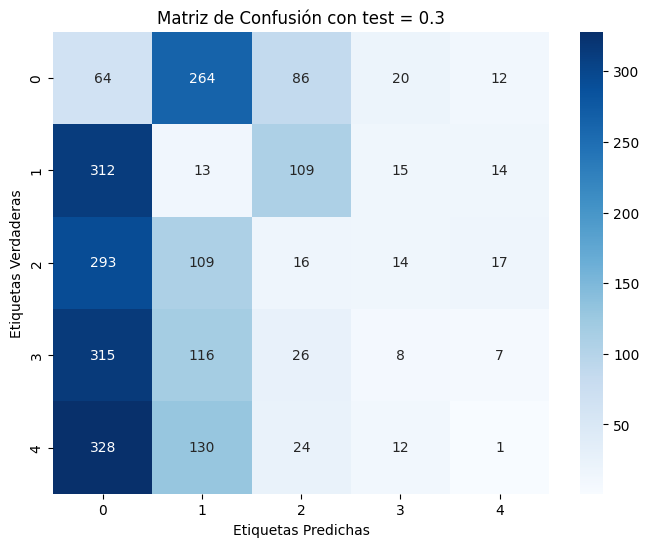

Exactitud del modelo: 0.04387096774193548
Precisión del modelo: 0.05300441117714012
Recall del modelo: 0.04387096774193548
Puntuación F1 del modelo: 0.0341832316030106
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.4.png


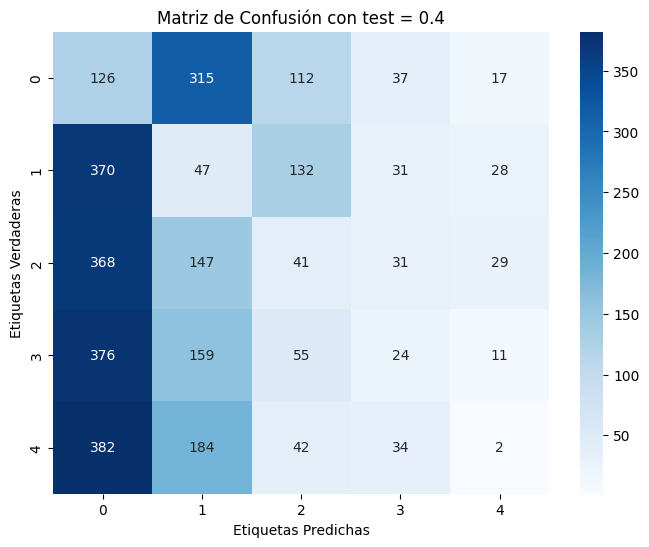

Exactitud del modelo: 0.07741935483870968
Precisión del modelo: 0.08295289870374445
Recall del modelo: 0.07741935483870968
Puntuación F1 del modelo: 0.06460323818893728
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.5.png


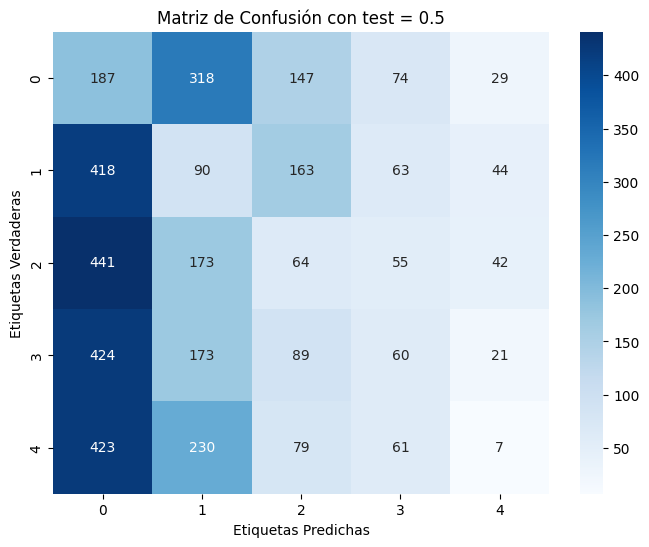

Exactitud del modelo: 0.10529032258064516
Precisión del modelo: 0.10927579816123288
Recall del modelo: 0.10529032258064516
Puntuación F1 del modelo: 0.09252515512422586
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.6.png


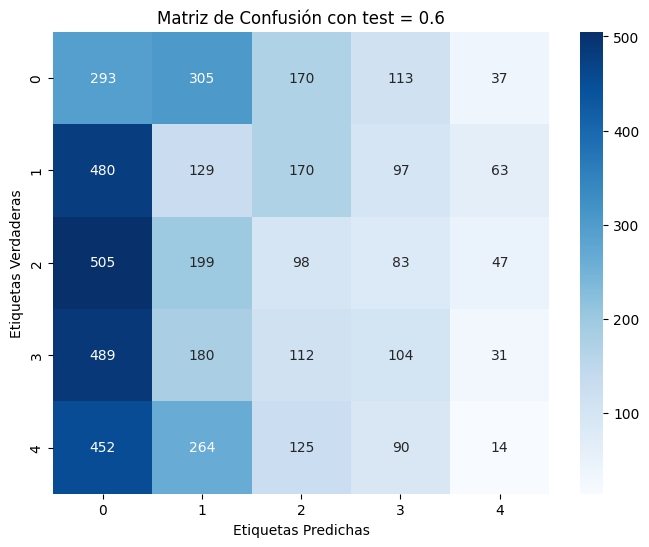

Exactitud del modelo: 0.13720430107526882
Precisión del modelo: 0.13624034798028073
Recall del modelo: 0.13720430107526882
Puntuación F1 del modelo: 0.12137621042647263
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.7.png


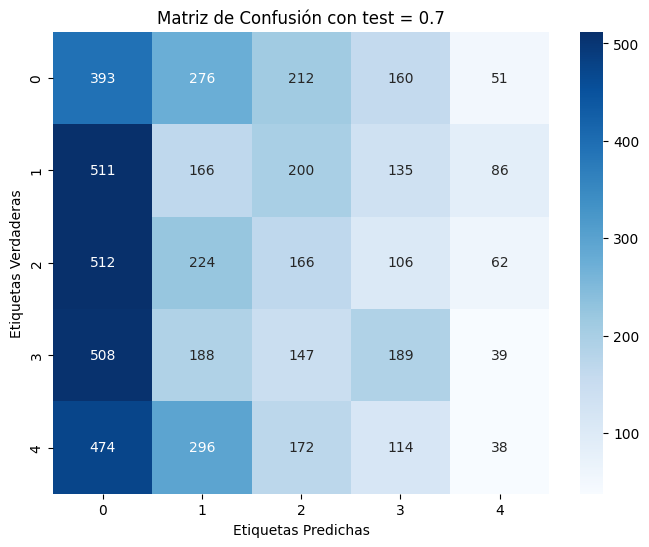

Exactitud del modelo: 0.17548387096774193
Precisión del modelo: 0.17946983123449115
Recall del modelo: 0.17548387096774193
Puntuación F1 del modelo: 0.1617440569091138
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.8.png


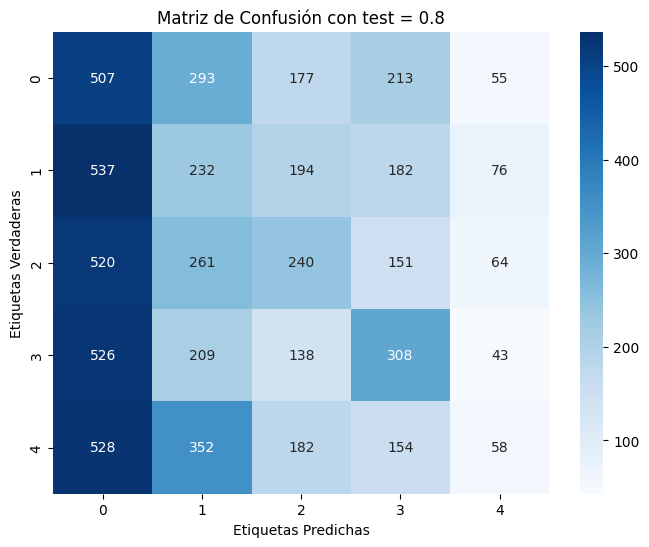

Exactitud del modelo: 0.21693548387096775
Precisión del modelo: 0.22478459940936613
Recall del modelo: 0.21693548387096775
Puntuación F1 del modelo: 0.20211823275570975
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/matriz_confusion_test_0.9.png


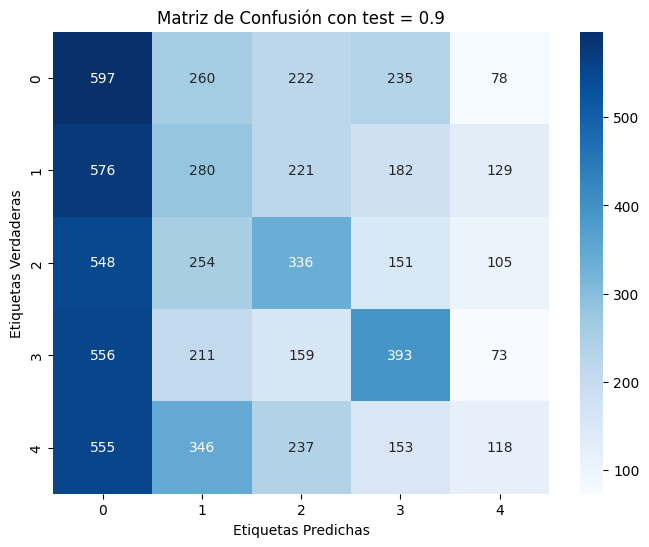

Exactitud del modelo: 0.247168458781362
Precisión del modelo: 0.25825779450671543
Recall del modelo: 0.247168458781362
Puntuación F1 del modelo: 0.23690522151325638
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_3_vecinos/KNN_gemini_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_cruz_3_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_2.png


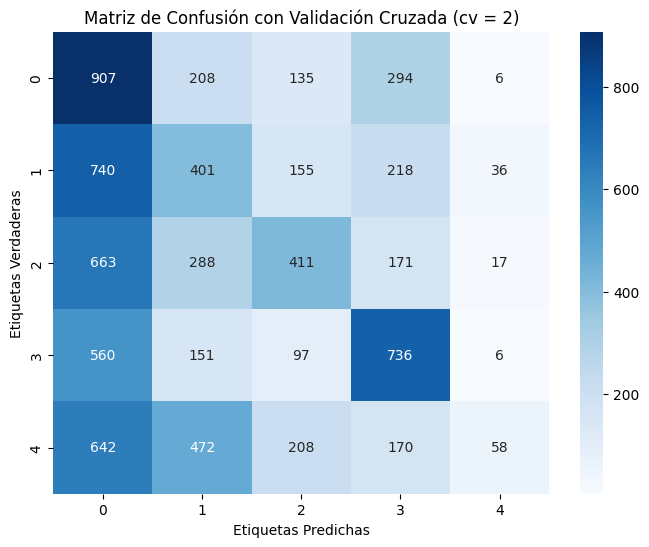

Exactitud media: 0.32425806451612904
Precisión media: 0.373070201712639
Recall media: 0.32425806451612904
Puntuación F1 media: 0.2958932167681201
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_3.png


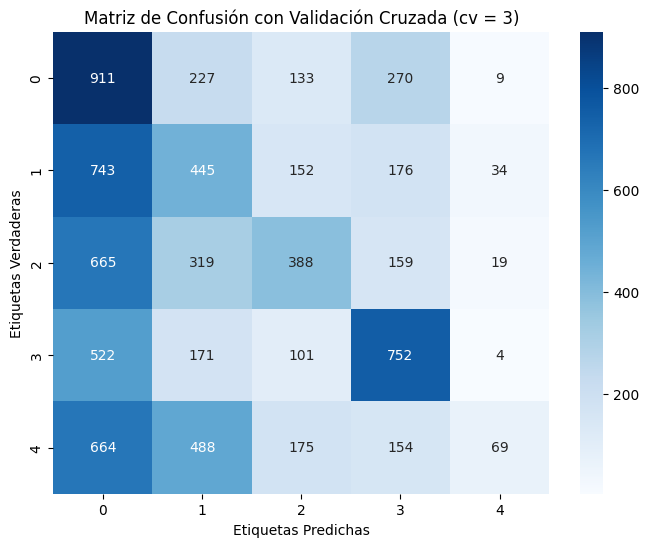

Exactitud media: 0.3309677419354839
Precisión media: 0.3894515129113032
Recall media: 0.3309677419354839
Puntuación F1 media: 0.30446524612028886
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_4.png


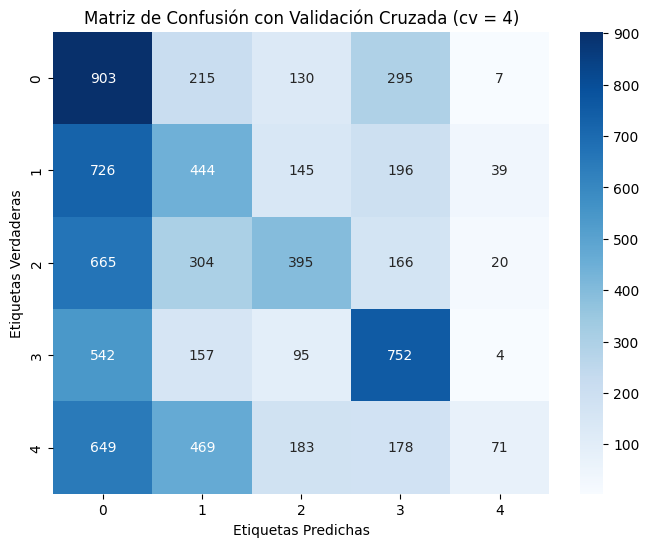

Exactitud media: 0.3309677419354839
Precisión media: 0.3865188580860468
Recall media: 0.3309677419354839
Puntuación F1 media: 0.30424955068971915
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_5.png


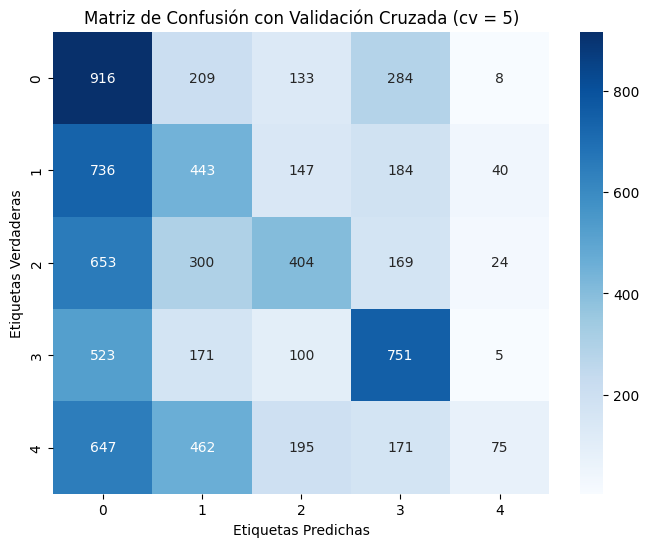

Exactitud media: 0.33406451612903226
Precisión media: 0.38617969588914813
Recall media: 0.33406451612903226
Puntuación F1 media: 0.30758635334191287
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_6.png


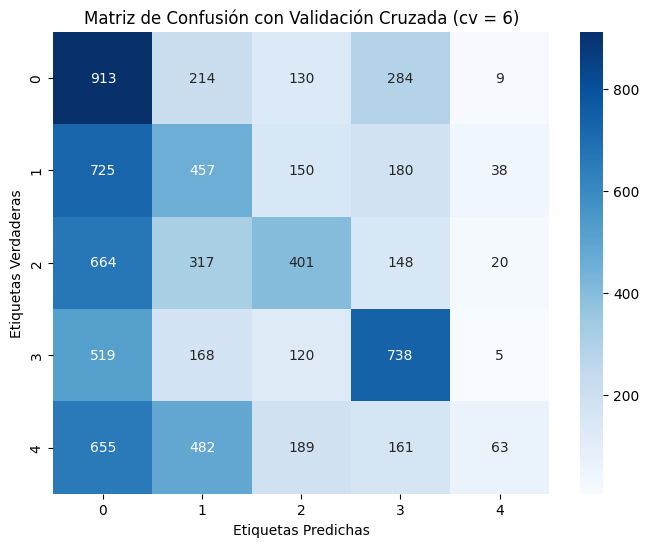

Exactitud media: 0.3318709677419355
Precisión media: 0.38035848892260526
Recall media: 0.3318709677419355
Puntuación F1 media: 0.3045463499909062
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_7.png


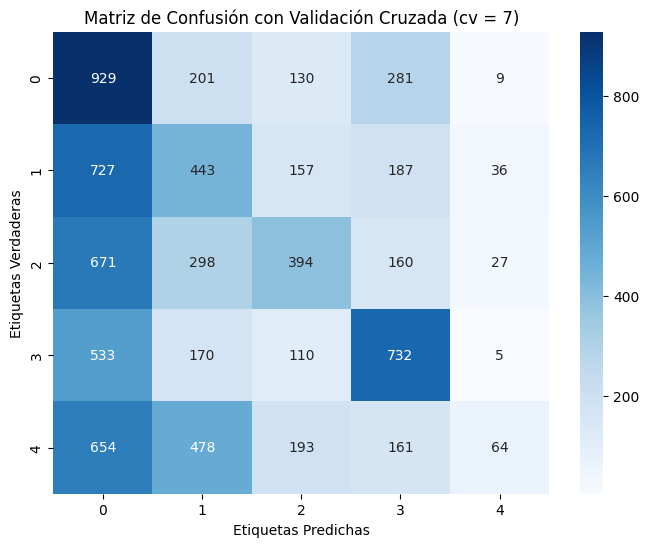

Exactitud media: 0.3305806451612903
Precisión media: 0.37571139599651615
Recall media: 0.3305806451612903
Puntuación F1 media: 0.302490514479554
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_8.png


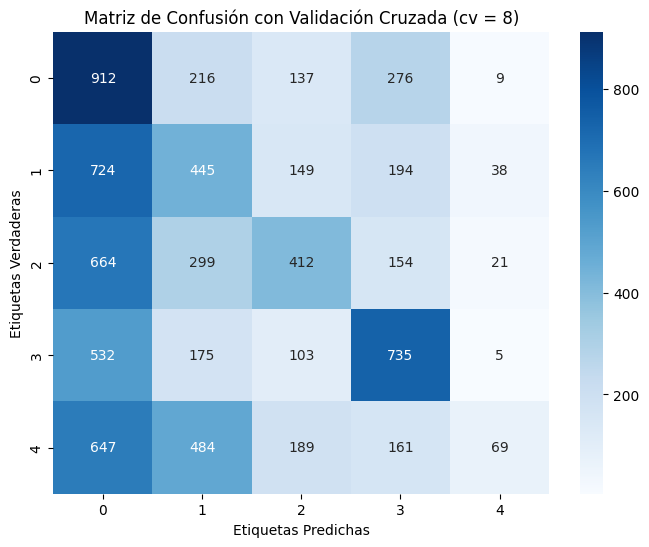

Exactitud media: 0.332
Precisión media: 0.3845270120720075
Recall media: 0.332
Puntuación F1 media: 0.30566782956469385
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_9.png


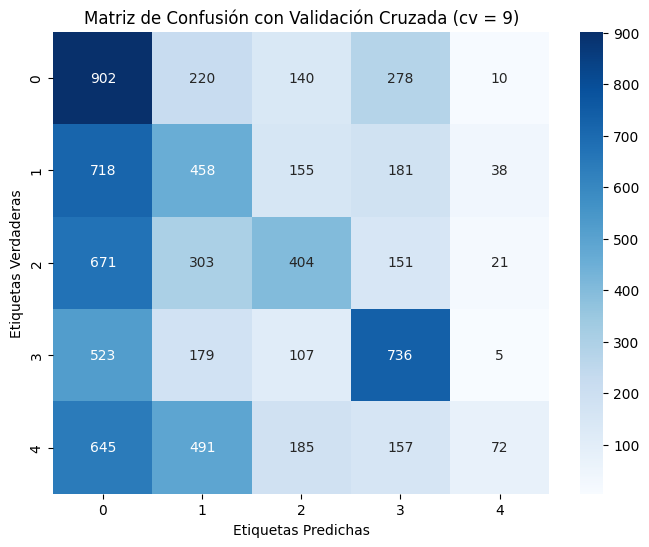

Exactitud media: 0.3318709677419355
Precisión media: 0.38573672766539824
Recall media: 0.3318709677419355
Puntuación F1 media: 0.3062703427075454
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_3_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/matriz_confusion_cv_10.png


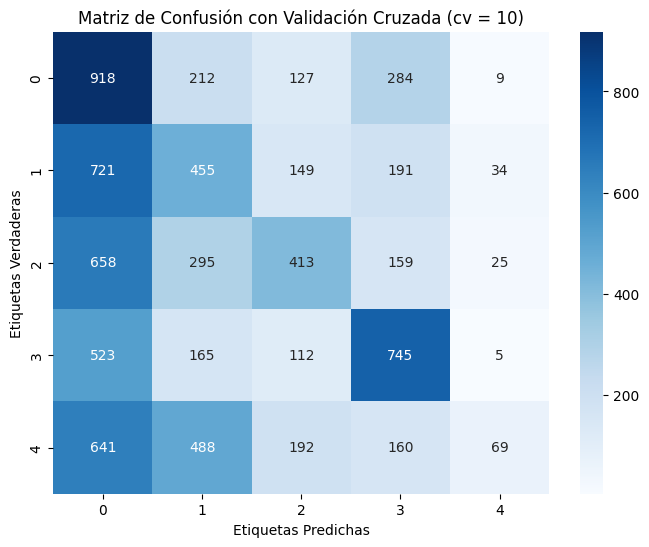

Exactitud media: 0.33548387096774196
Precisión media: 0.3865764900593535
Recall media: 0.33548387096774196
Puntuación F1 media: 0.30852878535360556
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_3_vecinos/KNN_gemini_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_simple_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.1.png


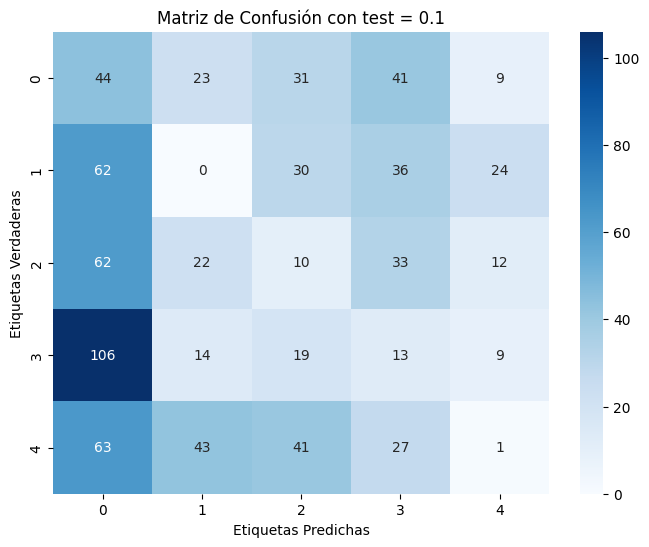

Exactitud del modelo: 0.08774193548387096
Precisión del modelo: 0.060734555709097804
Recall del modelo: 0.08774193548387096
Puntuación F1 del modelo: 0.0672663880620758
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.2.png


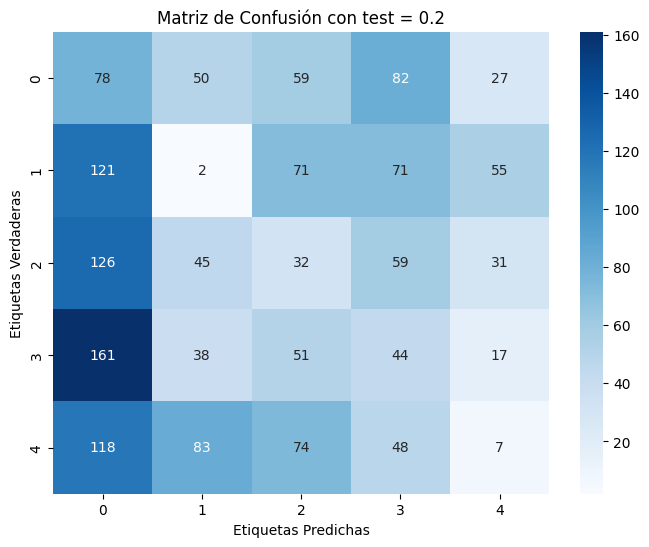

Exactitud del modelo: 0.10516129032258065
Precisión del modelo: 0.08755123012246192
Recall del modelo: 0.10516129032258065
Puntuación F1 del modelo: 0.09058750318227927
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.3.png


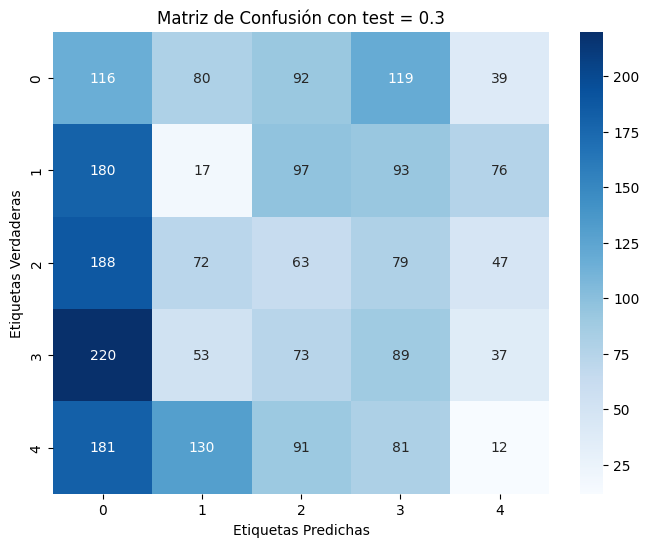

Exactitud del modelo: 0.12774193548387097
Precisión del modelo: 0.1153085813720163
Recall del modelo: 0.12774193548387097
Puntuación F1 del modelo: 0.11584316107541107
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.4.png


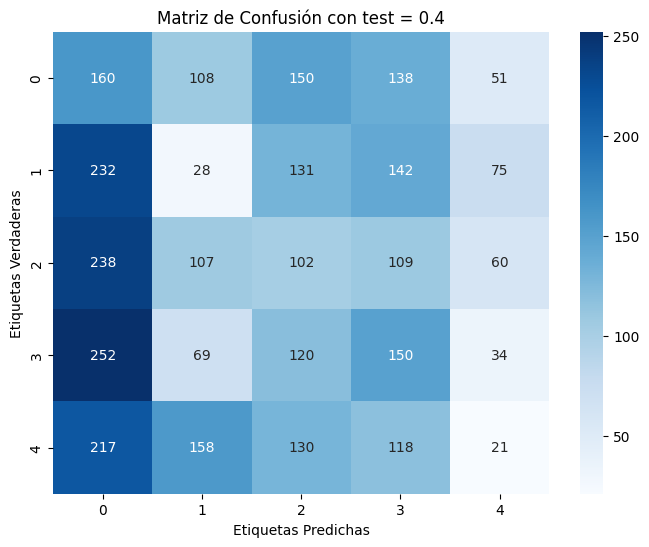

Exactitud del modelo: 0.14870967741935484
Precisión del modelo: 0.13634304296458566
Recall del modelo: 0.14870967741935484
Puntuación F1 del modelo: 0.13641020723074873
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.5.png


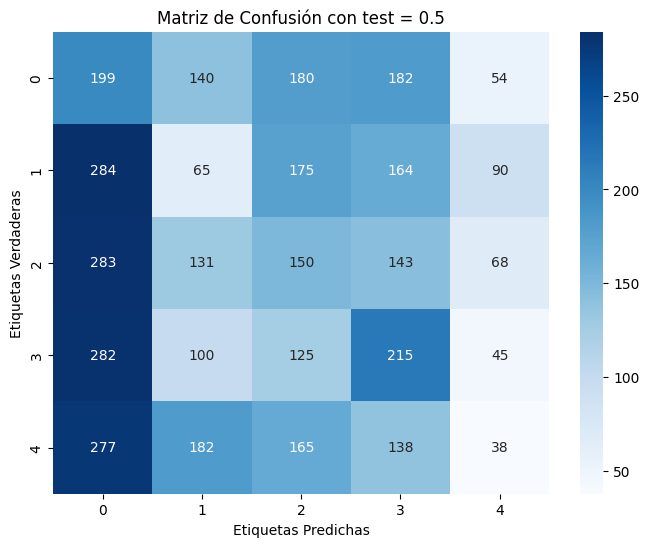

Exactitud del modelo: 0.17212903225806453
Precisión del modelo: 0.16525093238519678
Recall del modelo: 0.17212903225806453
Puntuación F1 del modelo: 0.16142160938729078
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.6.png


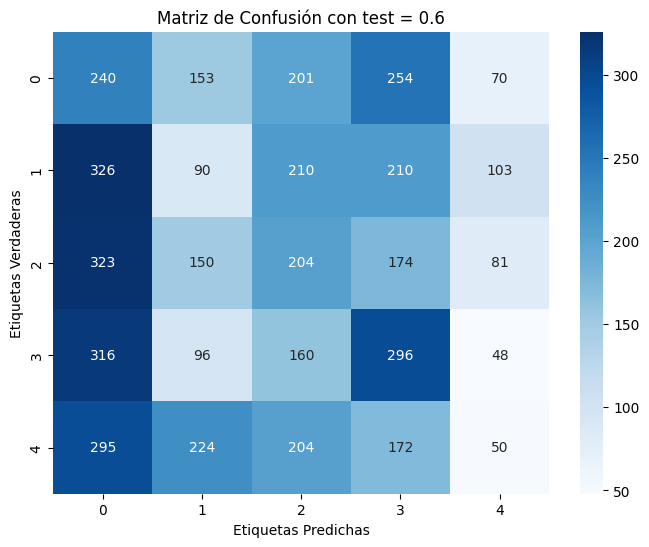

Exactitud del modelo: 0.18924731182795698
Precisión del modelo: 0.18042940369523205
Recall del modelo: 0.18924731182795698
Puntuación F1 del modelo: 0.17732789946862287
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.7.png


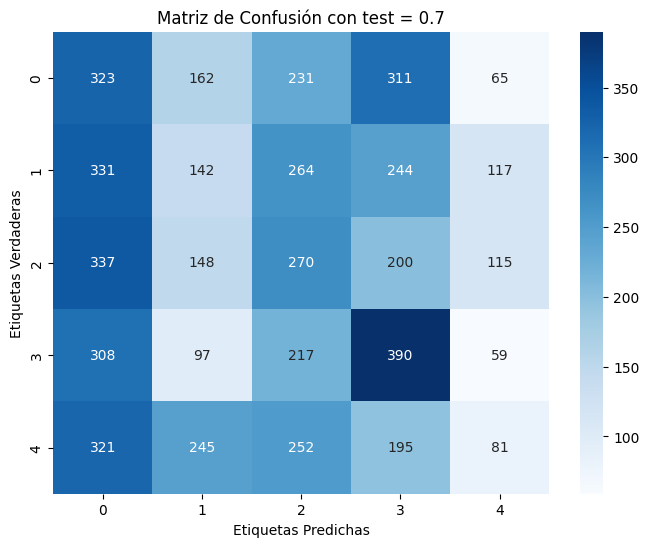

Exactitud del modelo: 0.22230414746543778
Precisión del modelo: 0.21432209494044427
Recall del modelo: 0.22230414746543778
Puntuación F1 del modelo: 0.20976201493250737
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.8.png


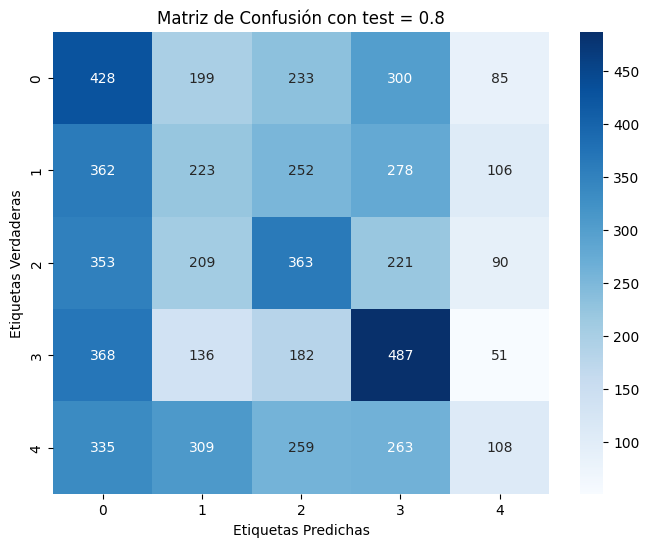

Exactitud del modelo: 0.25951612903225807
Precisión del modelo: 0.2560181309924916
Recall del modelo: 0.25951612903225807
Puntuación F1 del modelo: 0.2464053001423922
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/matriz_confusion_test_0.9.png


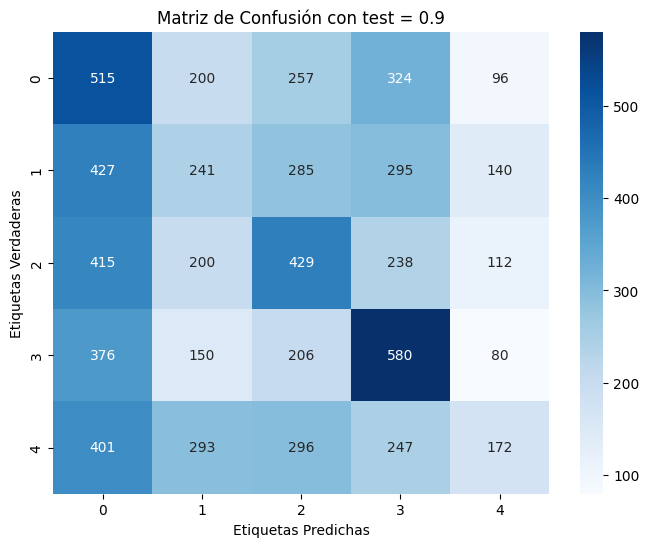

Exactitud del modelo: 0.27770609318996414
Precisión del modelo: 0.27725510428519484
Recall del modelo: 0.27770609318996414
Puntuación F1 del modelo: 0.26675918939697446
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_5_vecinos/KNN_gemini_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_cruz_5_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_2.png


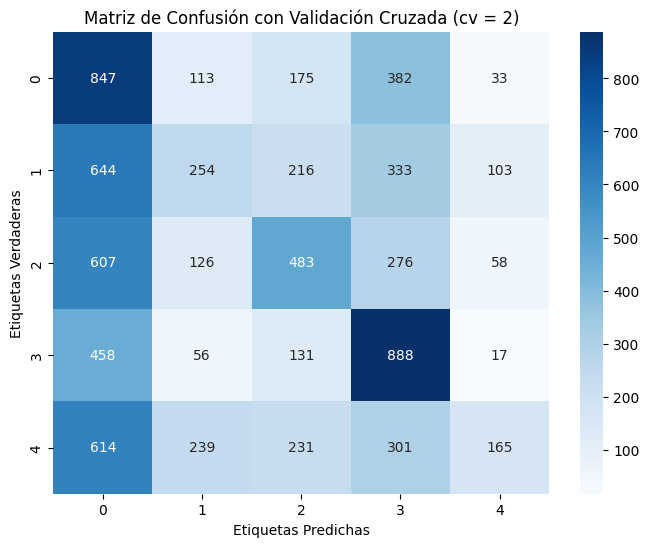

Exactitud media: 0.34025806451612906
Precisión media: 0.36529467804144916
Recall media: 0.34025806451612906
Puntuación F1 media: 0.31407813474776247
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_3.png


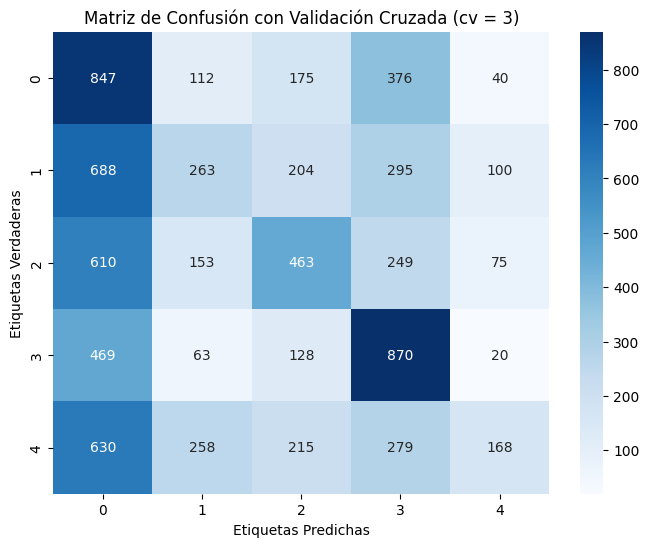

Exactitud media: 0.3369032258064516
Precisión media: 0.3597914716799889
Recall media: 0.3369032258064516
Puntuación F1 media: 0.3128058479431975
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_4.png


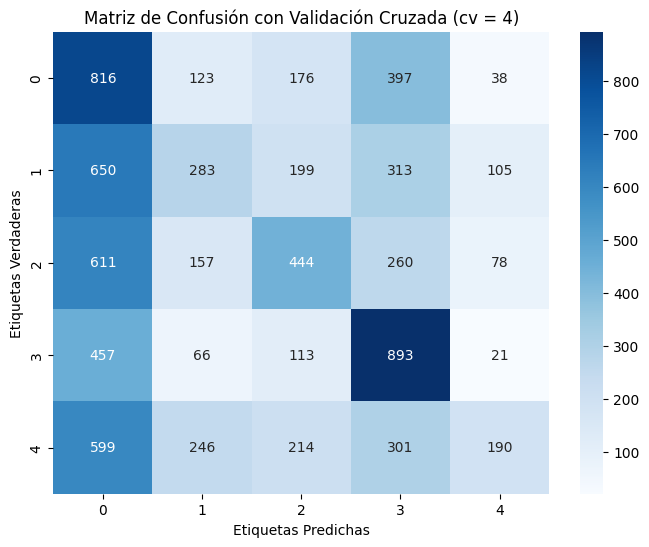

Exactitud media: 0.33883870967741936
Precisión media: 0.36475858368933306
Recall media: 0.33883870967741936
Puntuación F1 media: 0.31677642917057325
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_5.png


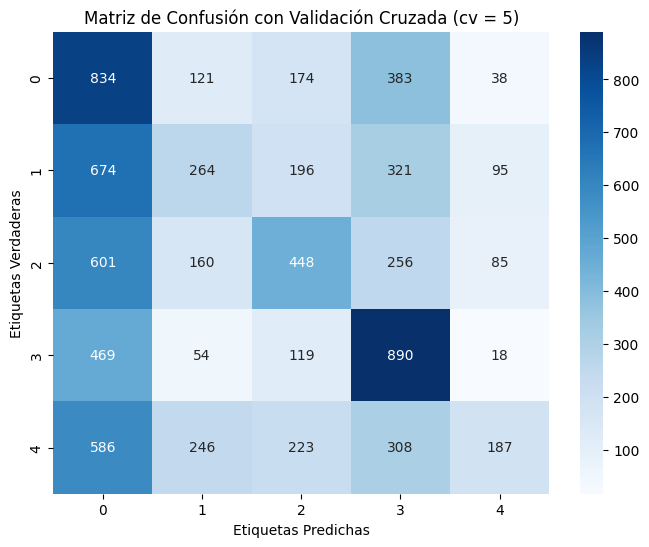

Exactitud media: 0.3384516129032258
Precisión media: 0.3633445217218119
Recall media: 0.3384516129032258
Puntuación F1 media: 0.3149056840374793
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_6.png


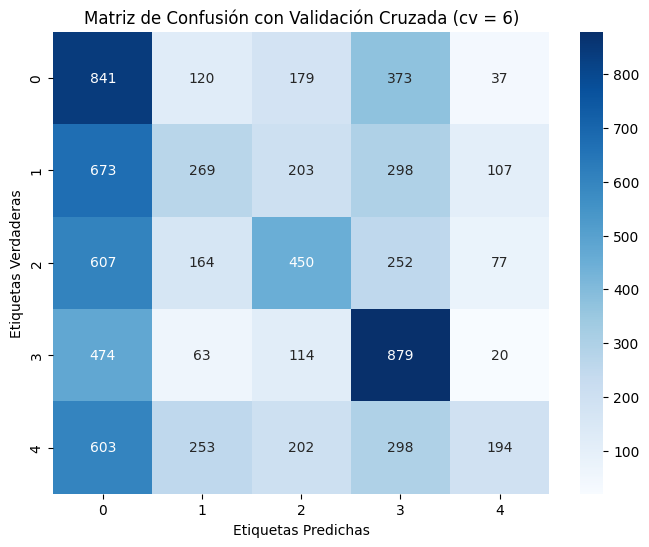

Exactitud media: 0.339741935483871
Precisión media: 0.3658125143213346
Recall media: 0.339741935483871
Puntuación F1 media: 0.3174701272629529
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_7.png


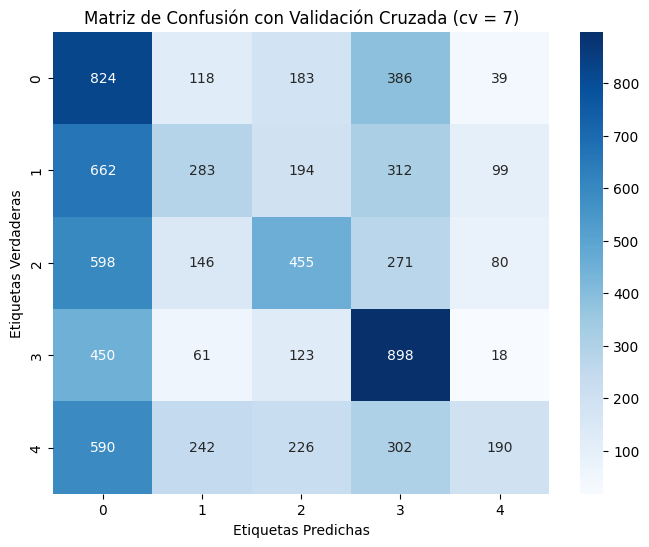

Exactitud media: 0.3419354838709677
Precisión media: 0.3683994738587784
Recall media: 0.3419354838709677
Puntuación F1 media: 0.31937332204384955
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_8.png


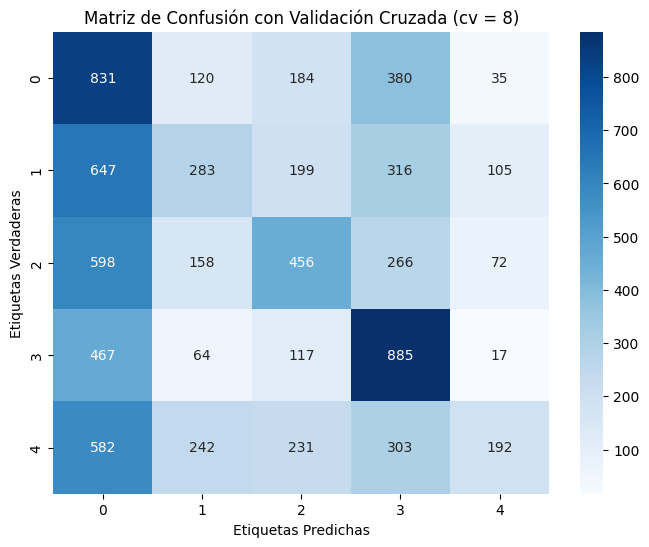

Exactitud media: 0.3415483870967742
Precisión media: 0.368835916905564
Recall media: 0.3415483870967742
Puntuación F1 media: 0.31921950076242545
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_9.png


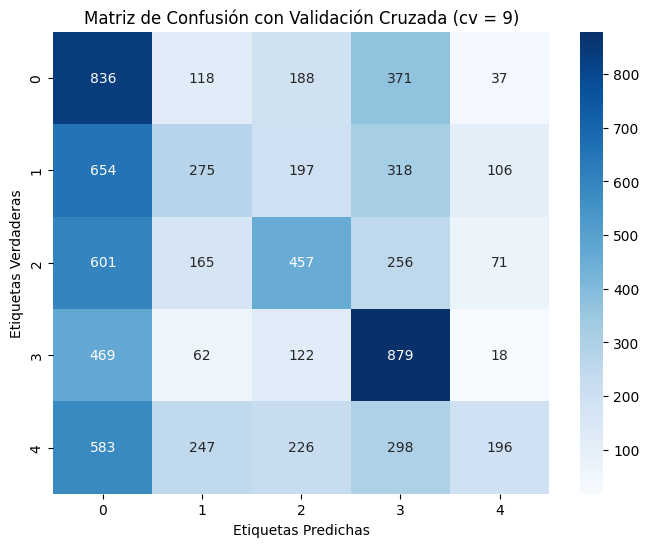

Exactitud media: 0.34103225806451615
Precisión media: 0.36787660057339094
Recall media: 0.34103225806451615
Puntuación F1 media: 0.3188689831433018
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_5_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/matriz_confusion_cv_10.png


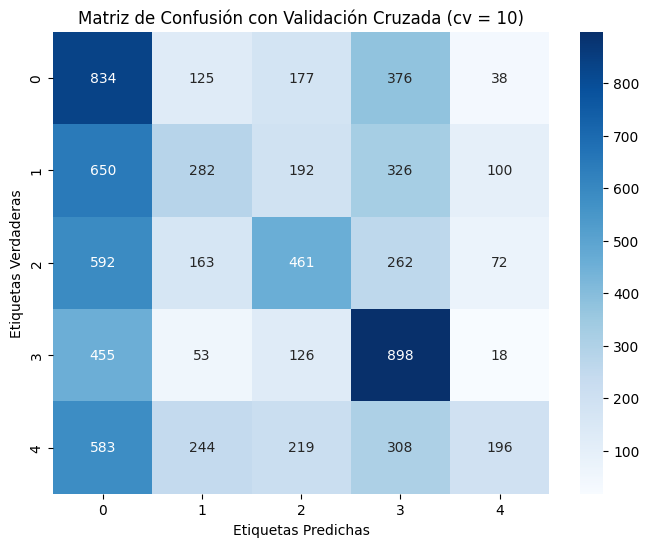

Exactitud media: 0.3446451612903226
Precisión media: 0.3723023425739401
Recall media: 0.3446451612903226
Puntuación F1 media: 0.3221411881401616
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_5_vecinos/KNN_gemini_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_simple_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.1.png


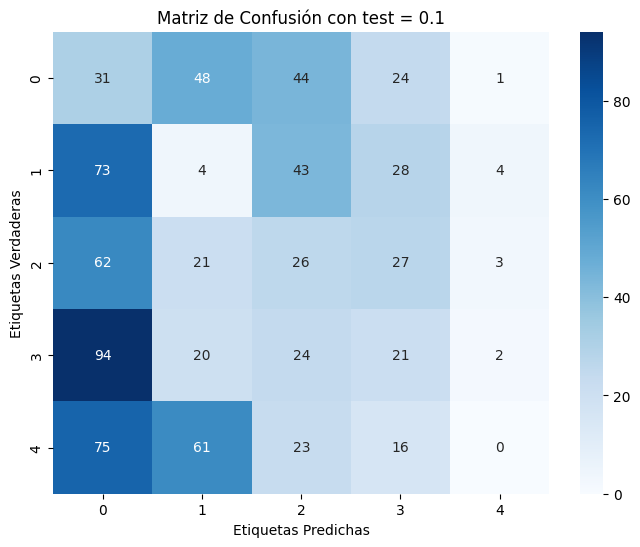

Exactitud del modelo: 0.10580645161290322
Precisión del modelo: 0.08951951749709623
Recall del modelo: 0.10580645161290322
Puntuación F1 del modelo: 0.09233193703977322
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.2.png


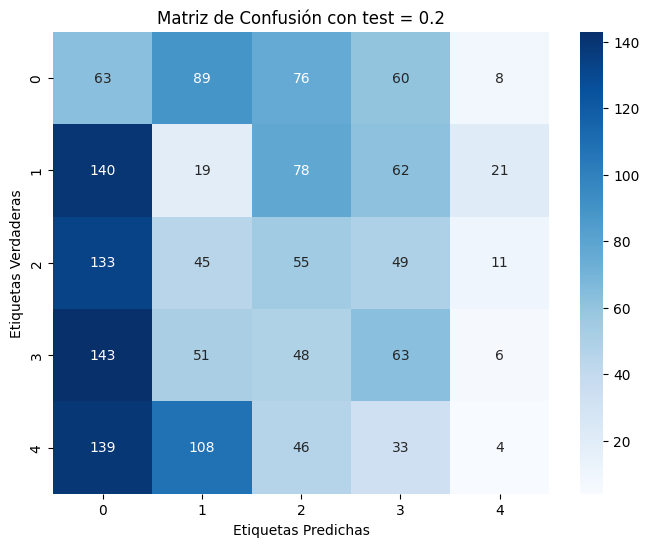

Exactitud del modelo: 0.13161290322580646
Precisión del modelo: 0.13072824369192979
Recall del modelo: 0.13161290322580646
Puntuación F1 del modelo: 0.12184913248401494
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.3.png


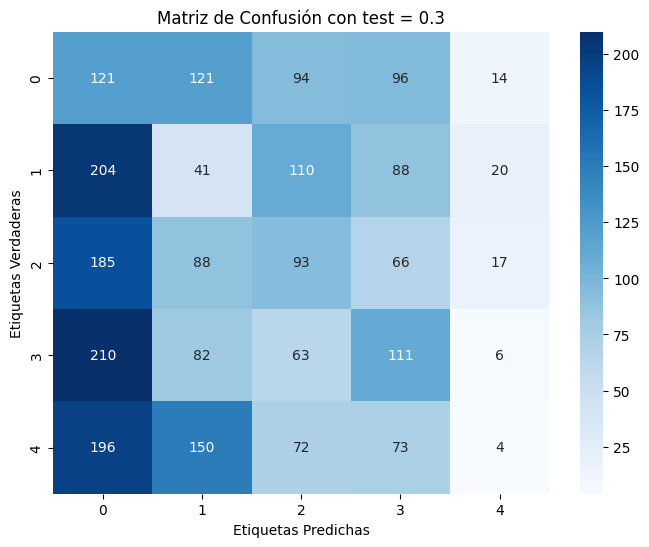

Exactitud del modelo: 0.15913978494623657
Precisión del modelo: 0.14973604181240405
Recall del modelo: 0.15913978494623657
Puntuación F1 del modelo: 0.14494338577433363
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.4.png


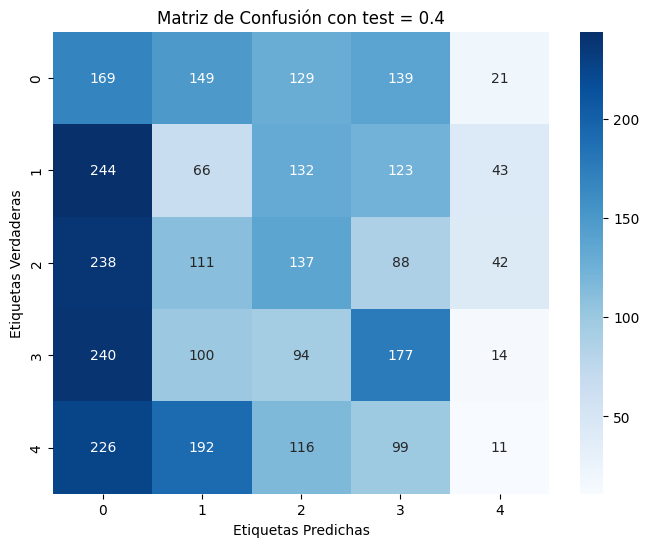

Exactitud del modelo: 0.18064516129032257
Precisión del modelo: 0.1697955540342551
Recall del modelo: 0.18064516129032257
Puntuación F1 del modelo: 0.16693635250337588
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.5.png


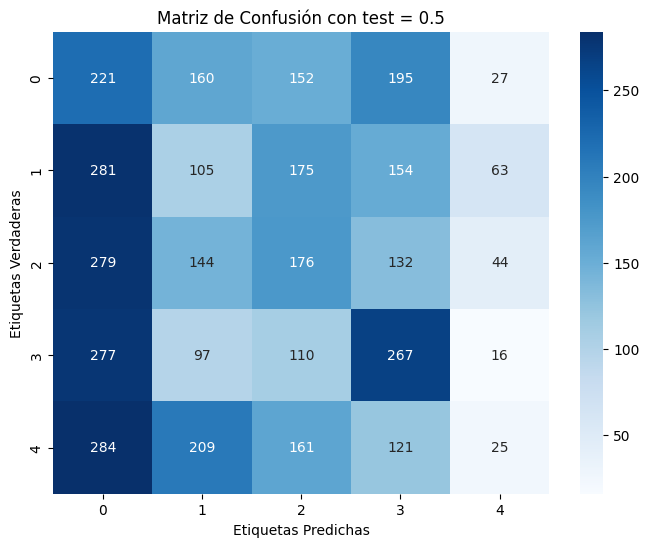

Exactitud del modelo: 0.20490322580645162
Precisión del modelo: 0.1973570237445816
Recall del modelo: 0.20490322580645162
Puntuación F1 del modelo: 0.1899509940967514
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.6.png


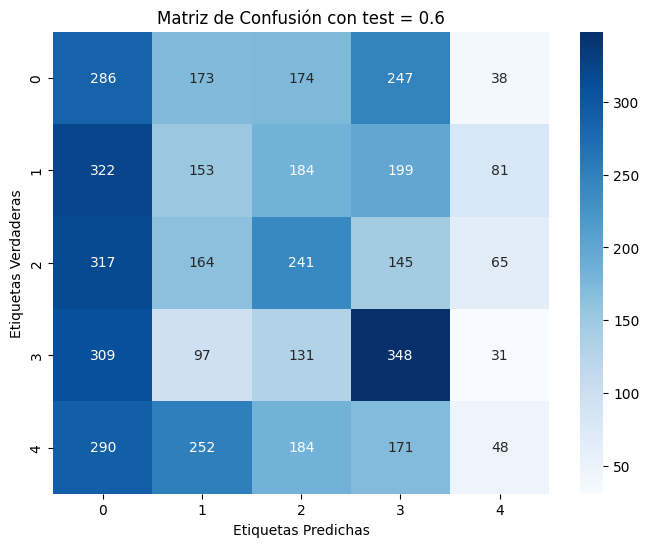

Exactitud del modelo: 0.23139784946236558
Precisión del modelo: 0.22557153069463437
Recall del modelo: 0.23139784946236558
Puntuación F1 del modelo: 0.21715240460292382
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.7.png


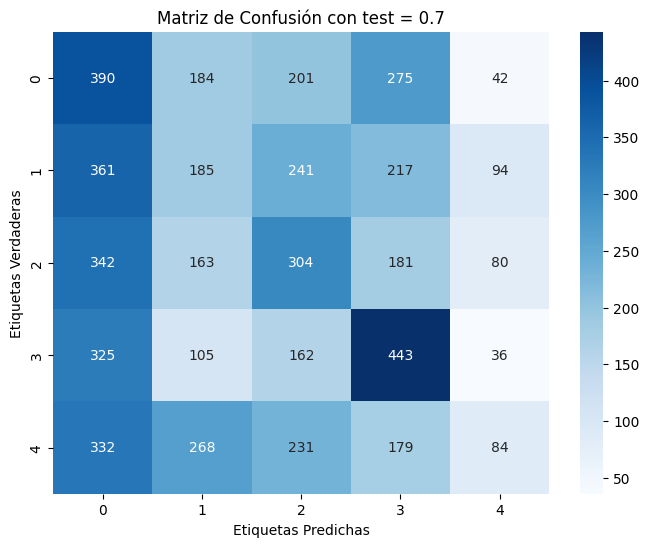

Exactitud del modelo: 0.2591705069124424
Precisión del modelo: 0.25682393679732646
Recall del modelo: 0.2591705069124424
Puntuación F1 del modelo: 0.24453816427050856
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.8.png


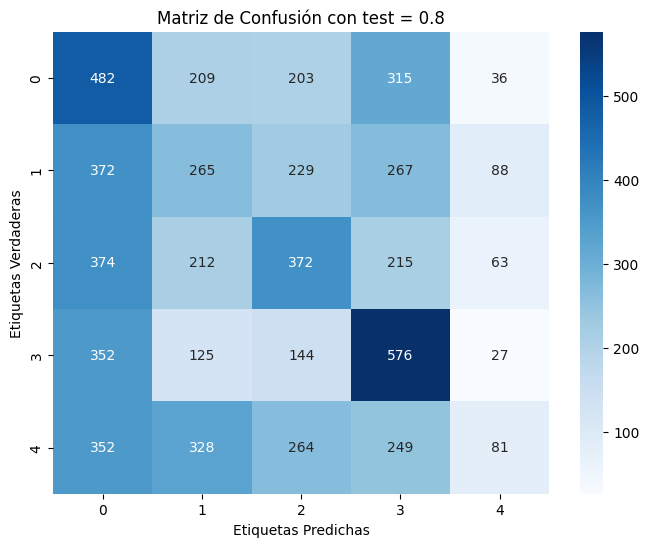

Exactitud del modelo: 0.2864516129032258
Precisión del modelo: 0.2836328408791097
Recall del modelo: 0.2864516129032258
Puntuación F1 del modelo: 0.26687360141283045
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/matriz_confusion_test_0.9.png


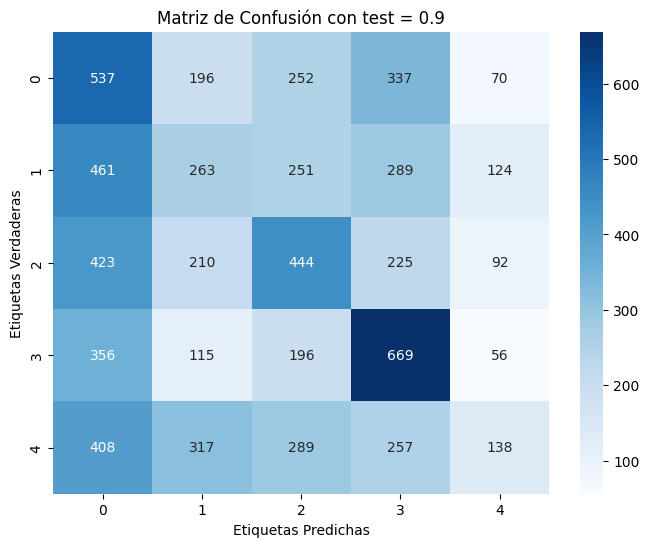

Exactitud del modelo: 0.29405017921146953
Precisión del modelo: 0.2917599300519668
Recall del modelo: 0.29405017921146953
Puntuación F1 del modelo: 0.27855154440681623
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_7_vecinos/KNN_gemini_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_cruz_7_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_2.png


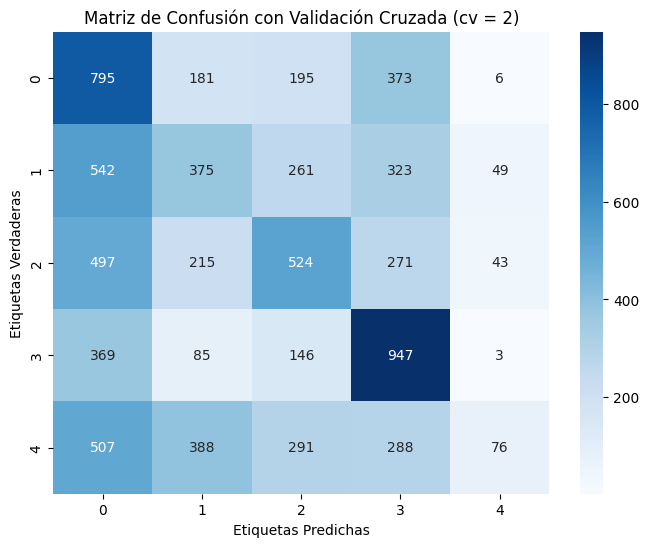

Exactitud media: 0.35058064516129034
Precisión media: 0.36480846616555007
Recall media: 0.35058064516129034
Puntuación F1 media: 0.31754037388588446
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_3.png


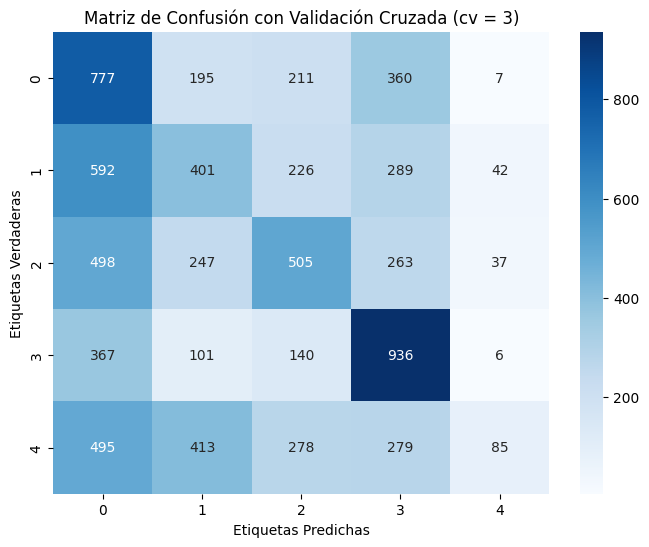

Exactitud media: 0.3489032258064516
Precisión media: 0.3743660806234407
Recall media: 0.3489032258064516
Puntuación F1 media: 0.3187362157477052
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_4.png


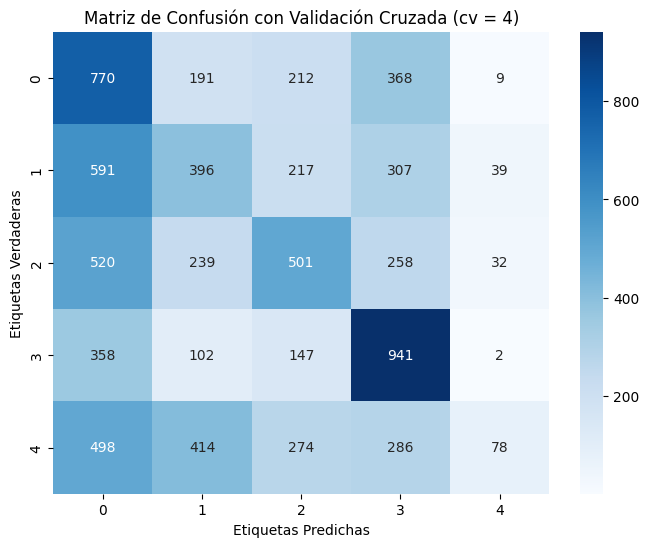

Exactitud media: 0.34658064516129033
Precisión media: 0.37407929122069244
Recall media: 0.34658064516129033
Puntuación F1 media: 0.31539766472122993
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_5.png


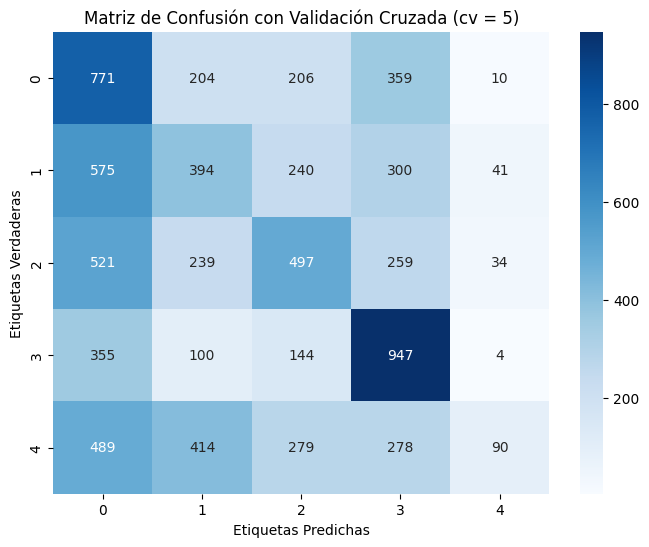

Exactitud media: 0.348258064516129
Precisión media: 0.37691318271219976
Recall media: 0.348258064516129
Puntuación F1 media: 0.31827277195776427
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_6.png


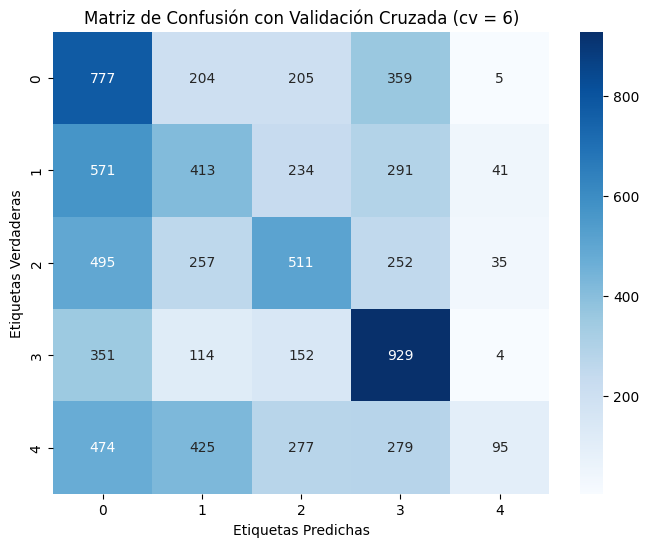

Exactitud media: 0.35161290322580646
Precisión media: 0.38442716307979075
Recall media: 0.35161290322580646
Puntuación F1 media: 0.32271879568684664
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_7.png


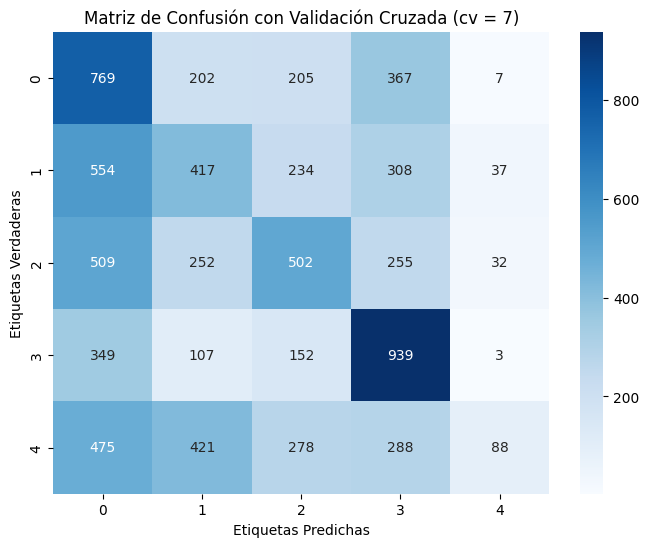

Exactitud media: 0.3503225806451613
Precisión media: 0.3832064447264992
Recall media: 0.3503225806451613
Puntuación F1 media: 0.3202614430861277
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_8.png


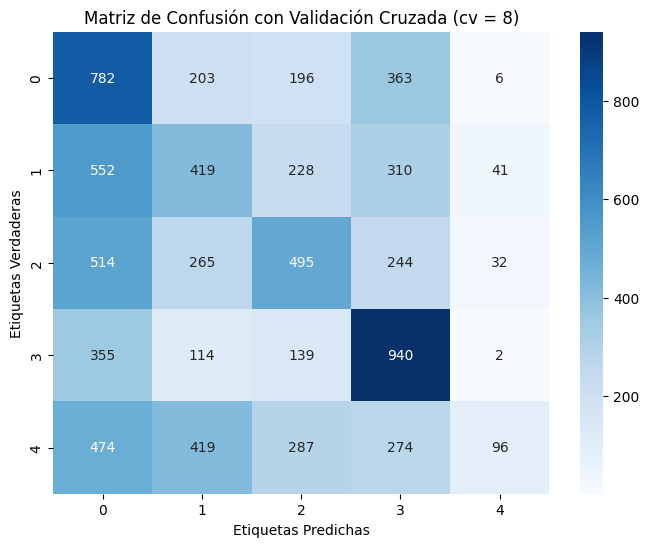

Exactitud media: 0.35251612903225804
Precisión media: 0.3877397095077719
Recall media: 0.35251612903225804
Puntuación F1 media: 0.3232064776501018
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_9.png


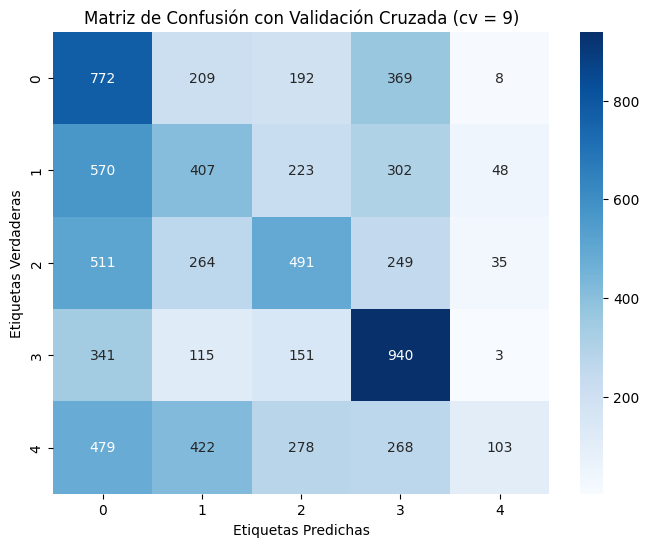

Exactitud media: 0.3500645161290323
Precisión media: 0.38168056531985306
Recall media: 0.3500645161290323
Puntuación F1 media: 0.3218826259804442
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_7_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/matriz_confusion_cv_10.png


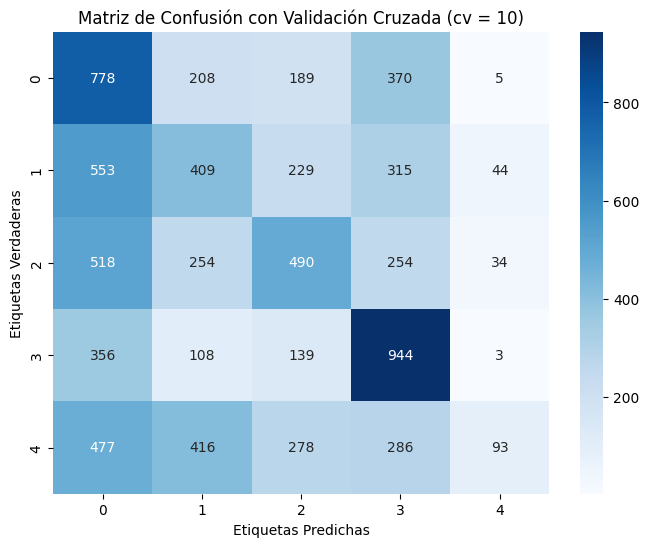

Exactitud media: 0.35019354838709676
Precisión media: 0.381571998244654
Recall media: 0.35019354838709676
Puntuación F1 media: 0.32030866422168836
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_7_vecinos/KNN_gemini_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_simple_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.1.png


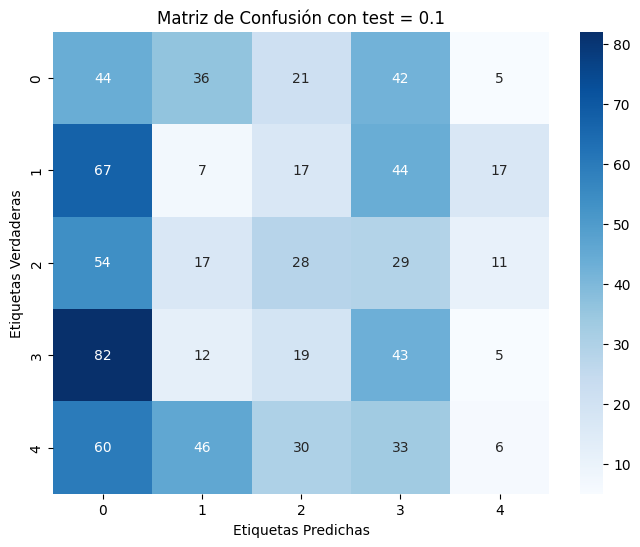

Exactitud del modelo: 0.16516129032258065
Precisión del modelo: 0.16023466252882895
Recall del modelo: 0.16516129032258065
Puntuación F1 del modelo: 0.149774961245953
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.2.png


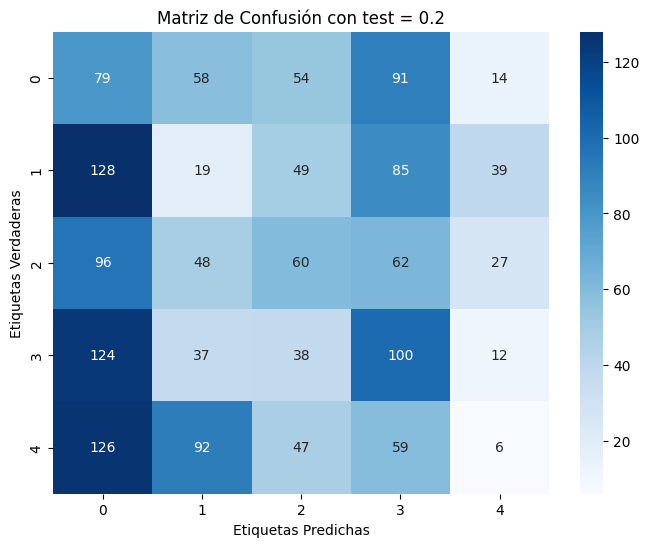

Exactitud del modelo: 0.1703225806451613
Precisión del modelo: 0.15203318196949853
Recall del modelo: 0.1703225806451613
Puntuación F1 del modelo: 0.15378506719265309
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.3.png


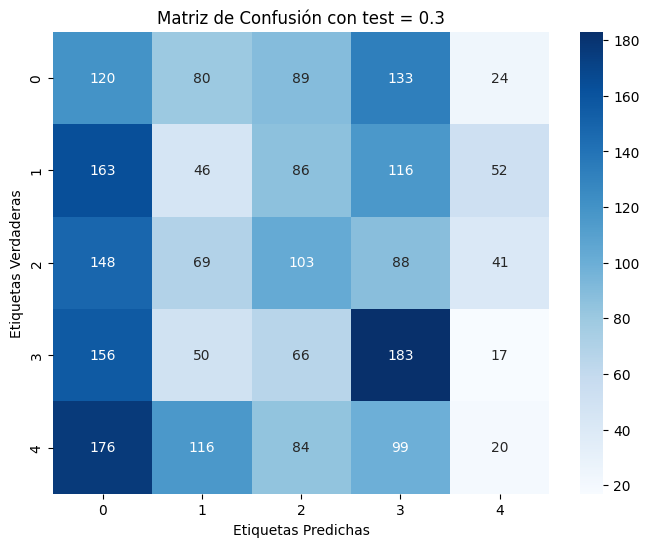

Exactitud del modelo: 0.20301075268817204
Precisión del modelo: 0.18968690140034003
Recall del modelo: 0.20301075268817204
Puntuación F1 del modelo: 0.18690227821439895
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.4.png


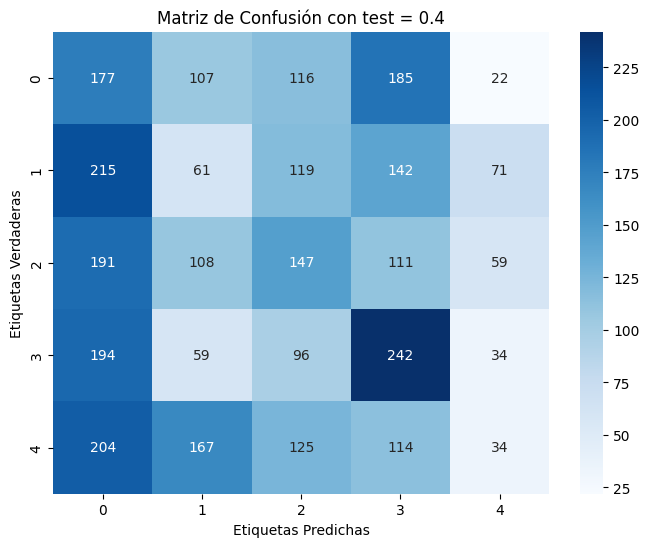

Exactitud del modelo: 0.2132258064516129
Precisión del modelo: 0.20115740858022968
Recall del modelo: 0.2132258064516129
Puntuación F1 del modelo: 0.1982483823948728
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.5.png


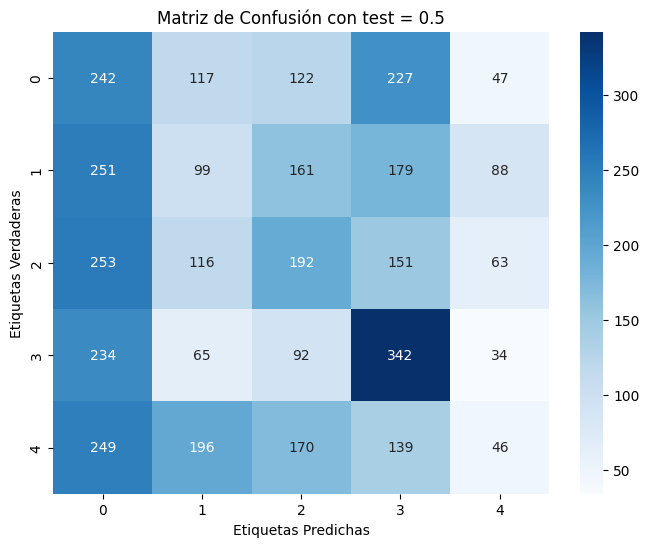

Exactitud del modelo: 0.23767741935483871
Precisión del modelo: 0.22336402243431686
Recall del modelo: 0.23767741935483871
Puntuación F1 del modelo: 0.2199470815099346
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.6.png


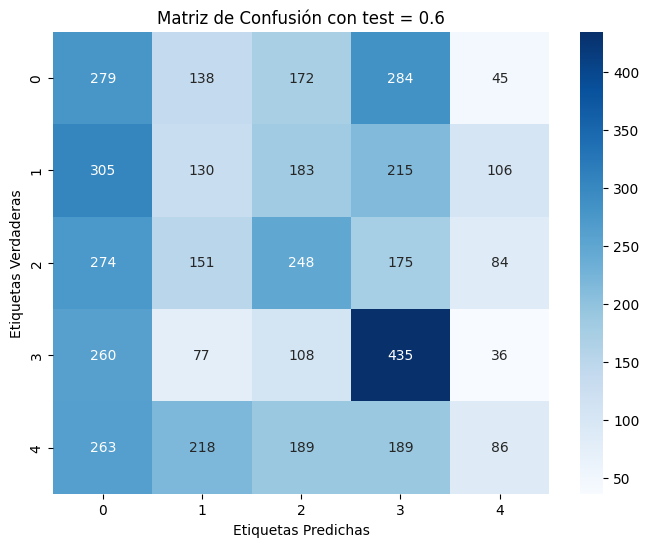

Exactitud del modelo: 0.25333333333333335
Precisión del modelo: 0.24685429081630994
Recall del modelo: 0.25333333333333335
Puntuación F1 del modelo: 0.23819852557536828
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.7.png


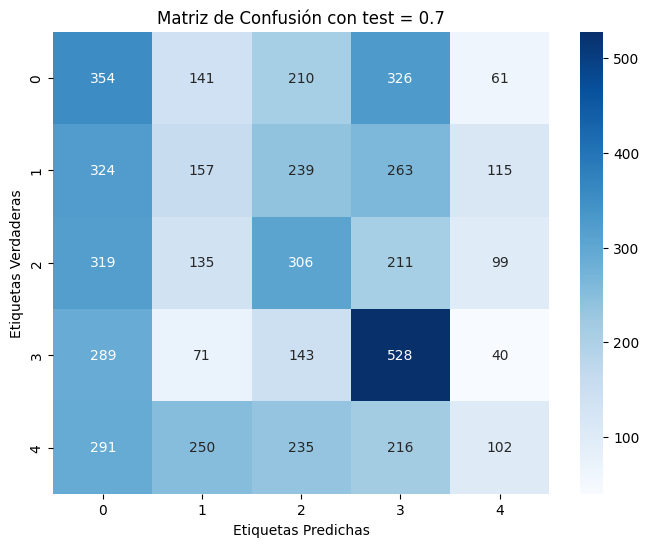

Exactitud del modelo: 0.26672811059907836
Precisión del modelo: 0.25743561201754656
Recall del modelo: 0.26672811059907836
Puntuación F1 del modelo: 0.24945256992665346
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.8.png


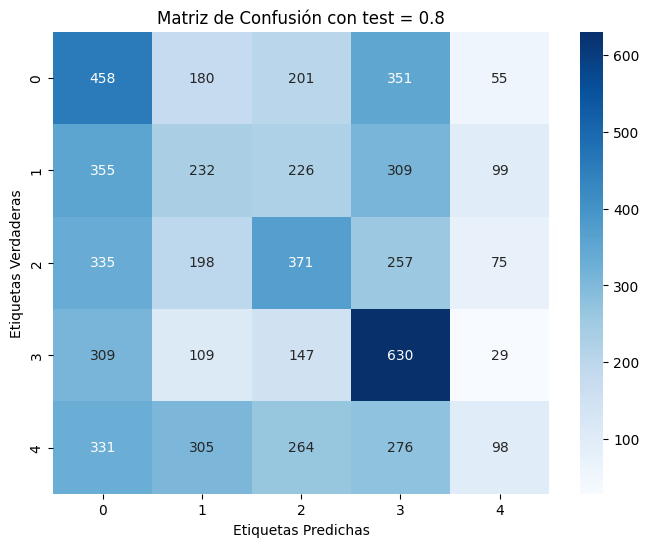

Exactitud del modelo: 0.2885483870967742
Precisión del modelo: 0.2820210478267763
Recall del modelo: 0.2885483870967742
Puntuación F1 del modelo: 0.26819386580466265
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/matriz_confusion_test_0.9.png


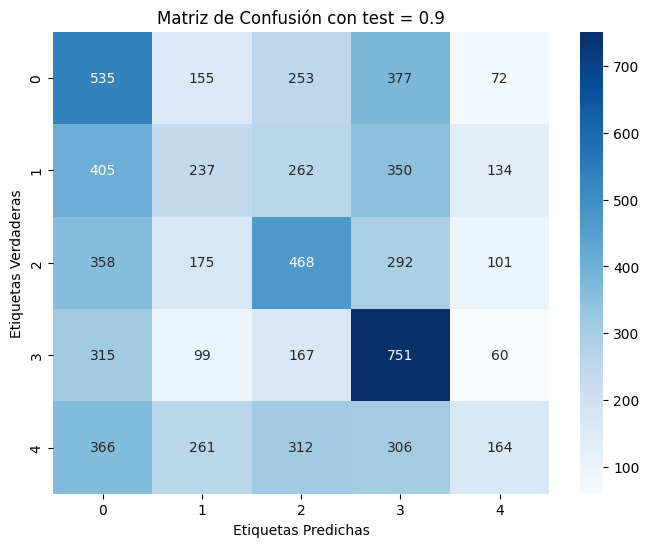

Exactitud del modelo: 0.3089605734767025
Precisión del modelo: 0.3033887793959898
Recall del modelo: 0.3089605734767025
Puntuación F1 del modelo: 0.2901782338685028
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_9_vecinos/KNN_gemini_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_cruz_9_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_2.png


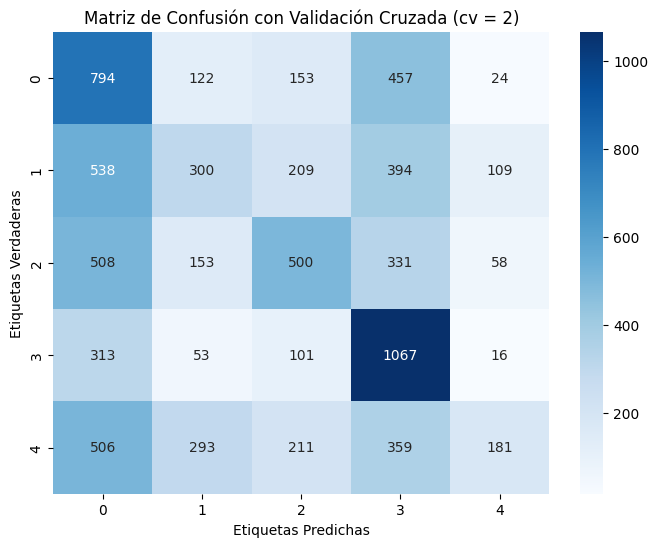

Exactitud media: 0.36670967741935484
Precisión media: 0.3851712777769756
Recall media: 0.36670967741935484
Puntuación F1 media: 0.3374457308137818
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_3.png


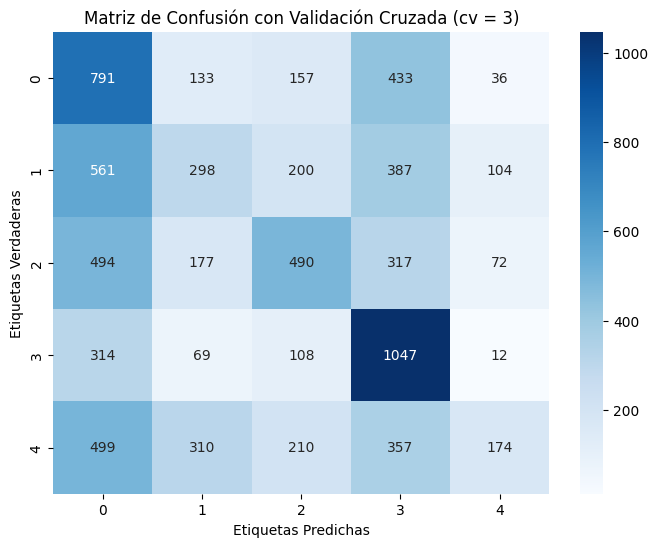

Exactitud media: 0.36129032258064514
Precisión media: 0.3738469144066907
Recall media: 0.36129032258064514
Puntuación F1 media: 0.3324484171915315
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_4.png


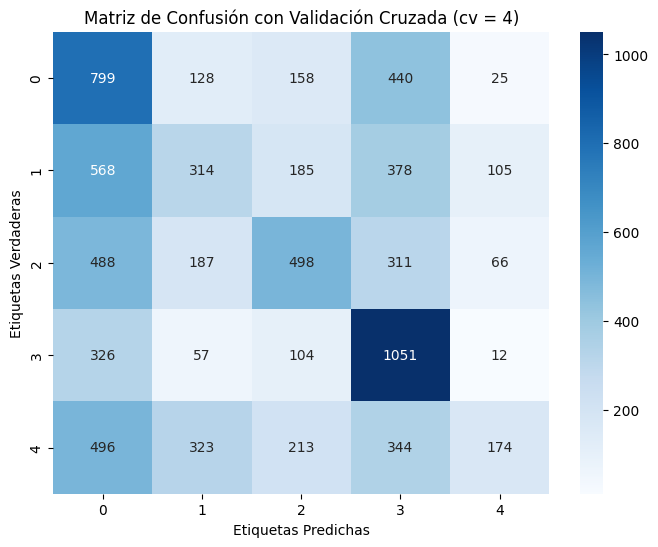

Exactitud media: 0.36593548387096775
Precisión media: 0.38232387465580225
Recall media: 0.36593548387096775
Puntuación F1 media: 0.33746648619155906
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_5.png


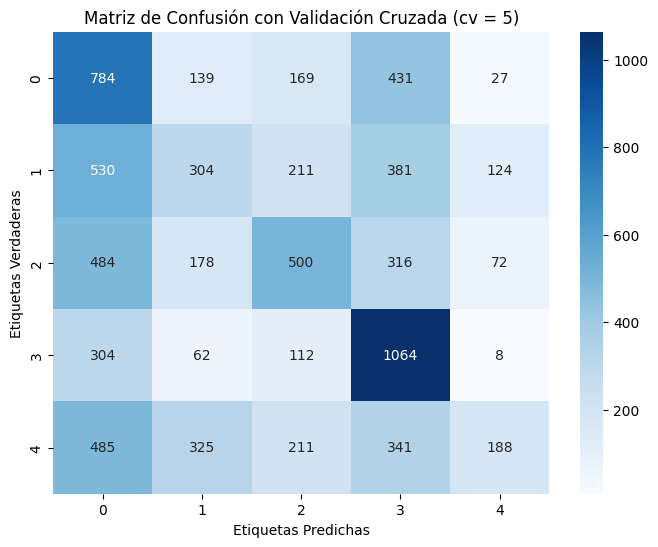

Exactitud media: 0.3664516129032258
Precisión media: 0.3778022501429675
Recall media: 0.3664516129032258
Puntuación F1 media: 0.33841793743519205
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_6.png


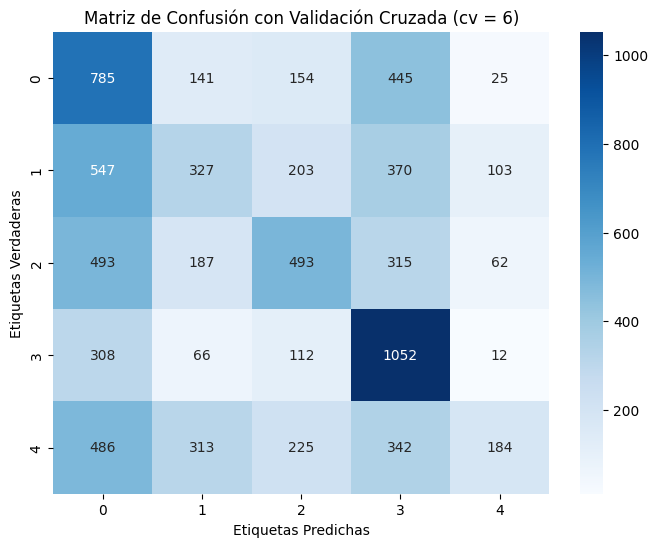

Exactitud media: 0.3665806451612903
Precisión media: 0.3849591492612999
Recall media: 0.3665806451612903
Puntuación F1 media: 0.33929238614455337
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_7.png


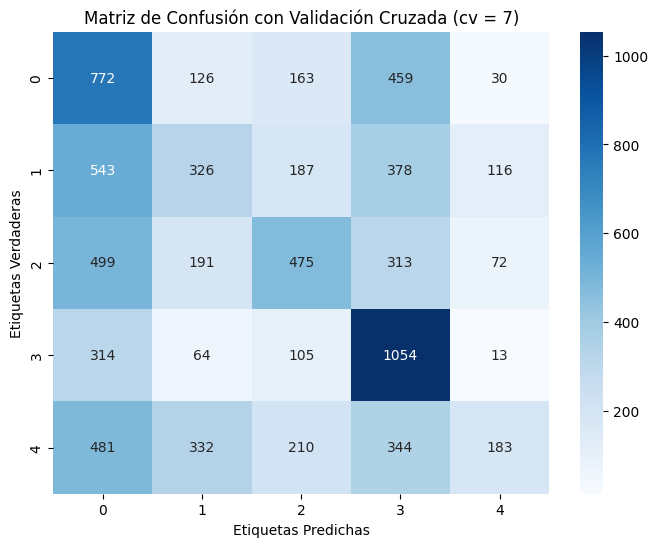

Exactitud media: 0.36258064516129035
Precisión media: 0.376403093731712
Recall media: 0.36258064516129035
Puntuación F1 media: 0.33539785391331695
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_8.png


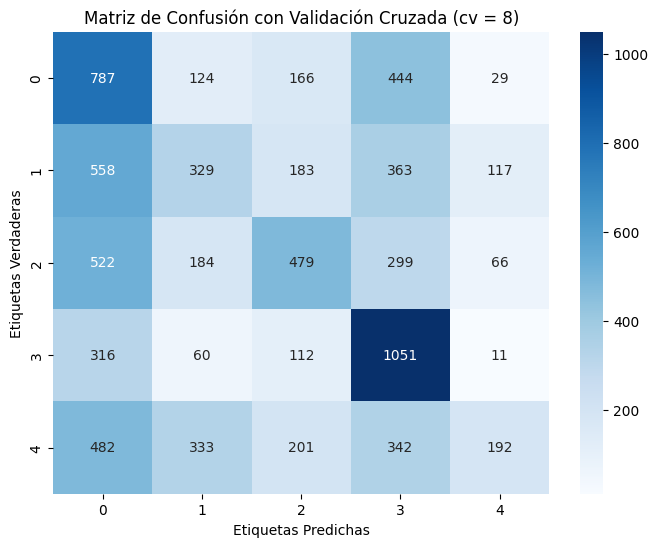

Exactitud media: 0.3661935483870968
Precisión media: 0.38355061211747254
Recall media: 0.3661935483870968
Puntuación F1 media: 0.33980577089659264
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_9.png


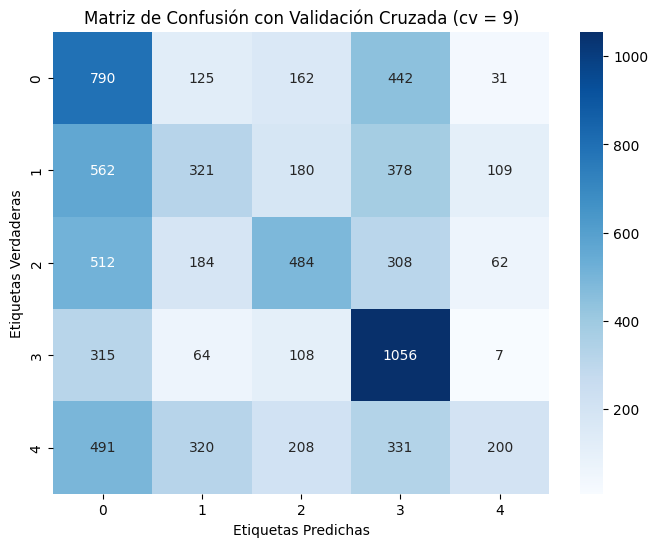

Exactitud media: 0.3678709677419355
Precisión media: 0.3890288662531101
Recall media: 0.3678709677419355
Puntuación F1 media: 0.3416249111297891
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_9_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/matriz_confusion_cv_10.png


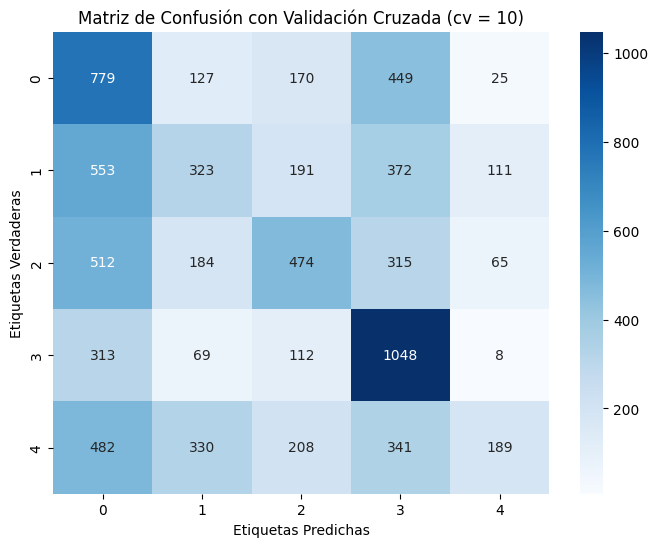

Exactitud media: 0.36296774193548387
Precisión media: 0.3816365136827222
Recall media: 0.36296774193548387
Puntuación F1 media: 0.3361772741497404
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_9_vecinos/KNN_gemini_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_simple_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.1.png


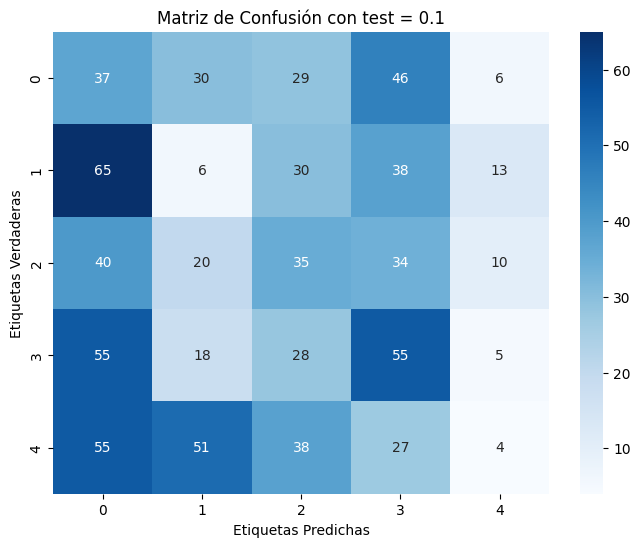

Exactitud del modelo: 0.1767741935483871
Precisión del modelo: 0.15758511143450024
Recall del modelo: 0.1767741935483871
Puntuación F1 del modelo: 0.15759688421083515
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.2.png


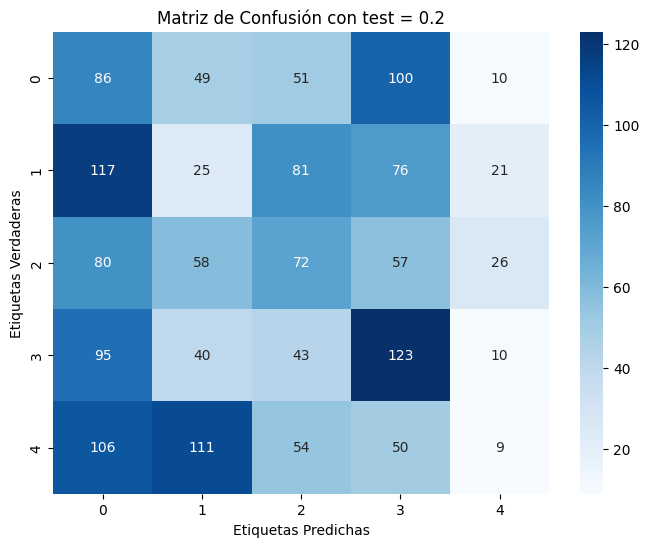

Exactitud del modelo: 0.2032258064516129
Precisión del modelo: 0.18338589063721666
Recall del modelo: 0.2032258064516129
Puntuación F1 del modelo: 0.18333520343713702
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.3.png


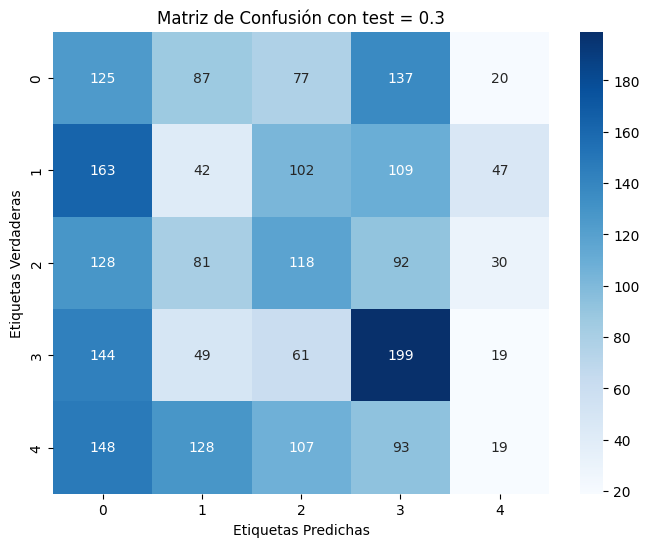

Exactitud del modelo: 0.21634408602150537
Precisión del modelo: 0.19857613547250666
Recall del modelo: 0.21634408602150537
Puntuación F1 del modelo: 0.1972625727447659
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.4.png


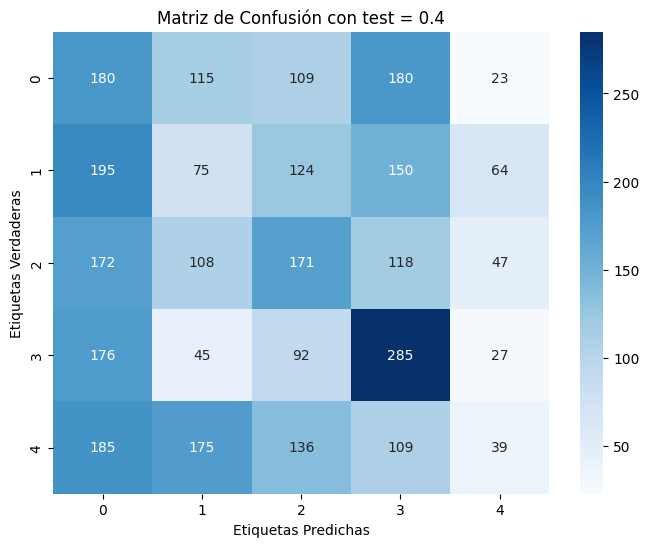

Exactitud del modelo: 0.24193548387096775
Precisión del modelo: 0.22972969413476219
Recall del modelo: 0.24193548387096775
Puntuación F1 del modelo: 0.22464487449622964
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.5.png


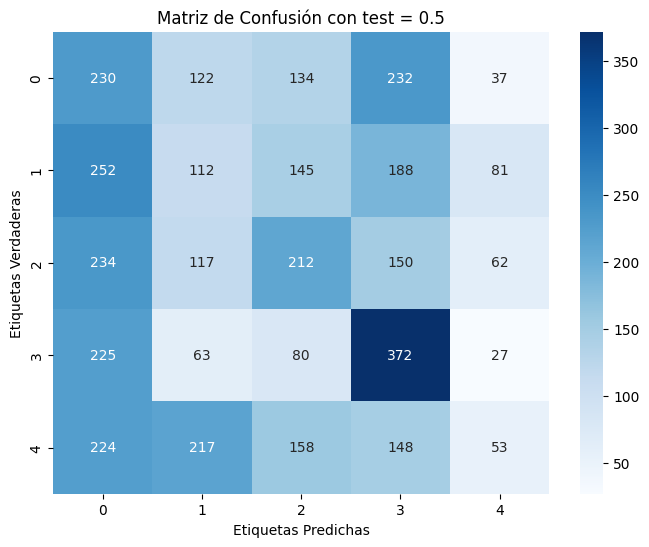

Exactitud del modelo: 0.2526451612903226
Precisión del modelo: 0.24190116164001968
Recall del modelo: 0.2526451612903226
Puntuación F1 del modelo: 0.2349290271591067
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.6.png


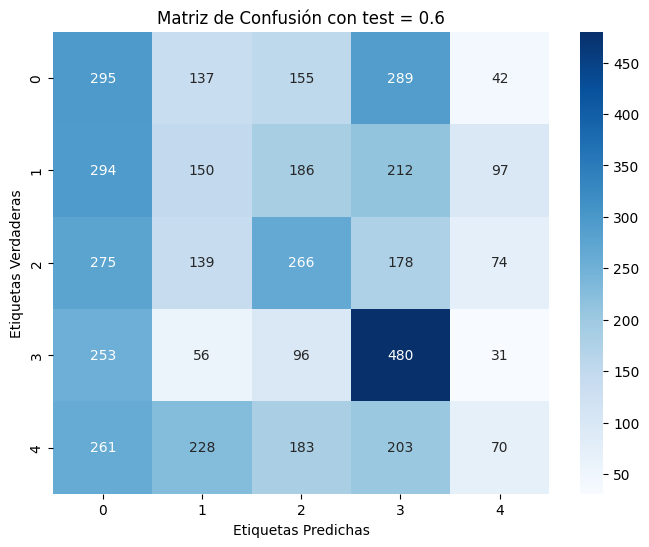

Exactitud del modelo: 0.27118279569892473
Precisión del modelo: 0.259828556184196
Recall del modelo: 0.27118279569892473
Puntuación F1 del modelo: 0.25173434810859746
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.7.png


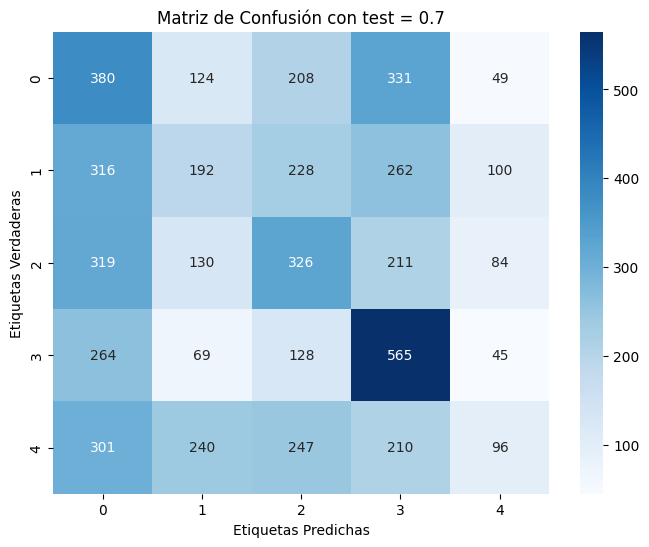

Exactitud del modelo: 0.2873732718894009
Precisión del modelo: 0.27883663763545014
Recall del modelo: 0.2873732718894009
Puntuación F1 del modelo: 0.2680216313047196
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.8.png


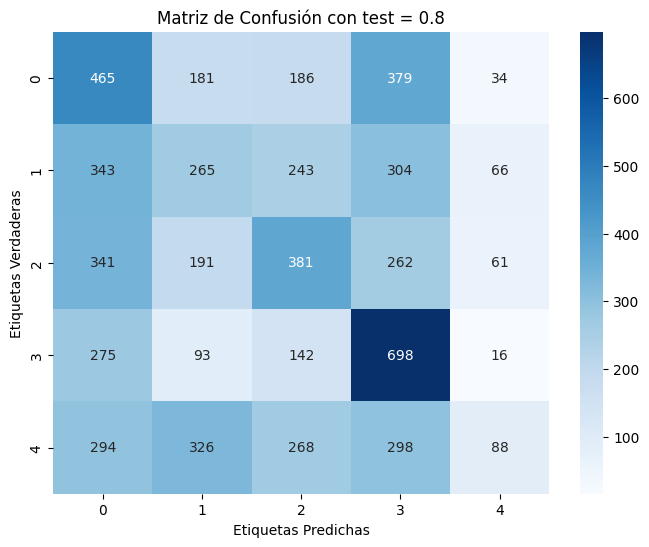

Exactitud del modelo: 0.3059677419354839
Precisión del modelo: 0.3052587095453617
Recall del modelo: 0.3059677419354839
Puntuación F1 del modelo: 0.28129418742368156
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/matriz_confusion_test_0.9.png


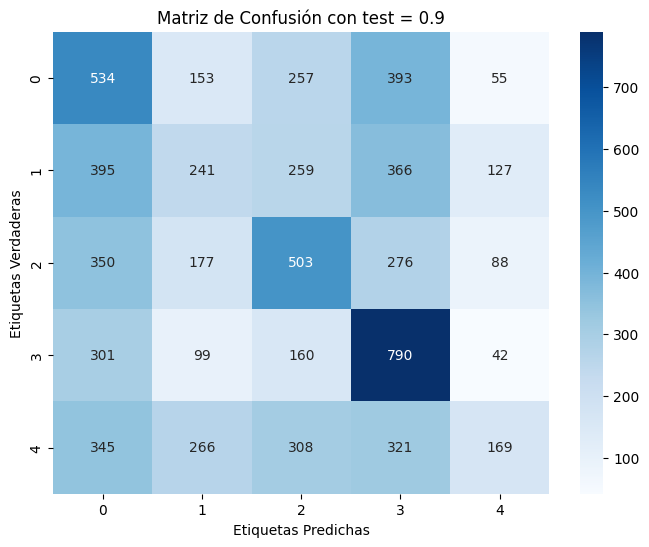

Exactitud del modelo: 0.3207168458781362
Precisión del modelo: 0.3186455343929829
Recall del modelo: 0.3207168458781362
Puntuación F1 del modelo: 0.30056598520485583
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_11_vecinos/KNN_gemini_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_cruz_11_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_2.png


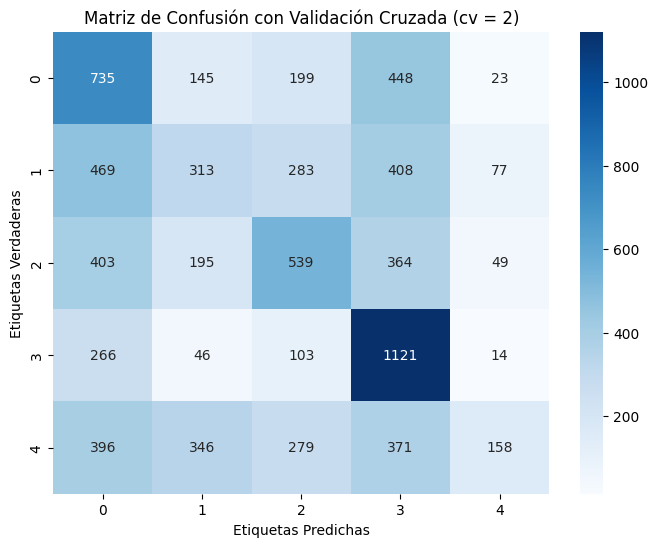

Exactitud media: 0.3698064516129032
Precisión media: 0.38263789260500797
Recall media: 0.3698064516129032
Puntuación F1 media: 0.33722817956701867
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_3.png


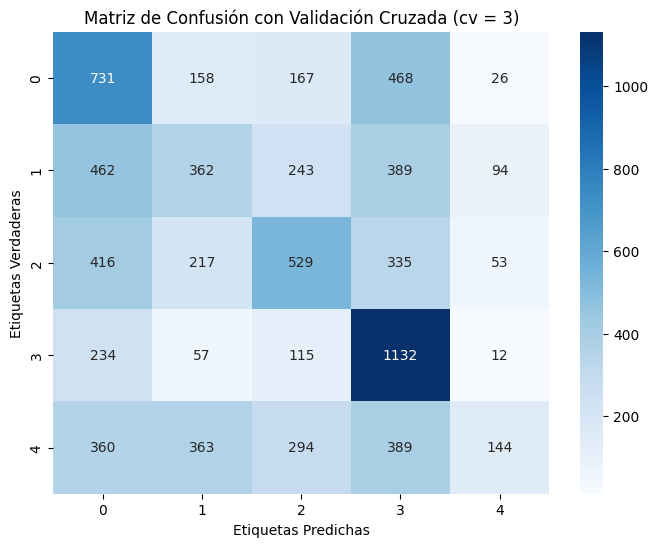

Exactitud media: 0.37393548387096776
Precisión media: 0.3784143717392218
Recall media: 0.37393548387096776
Puntuación F1 media: 0.34128871006385275
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_4.png


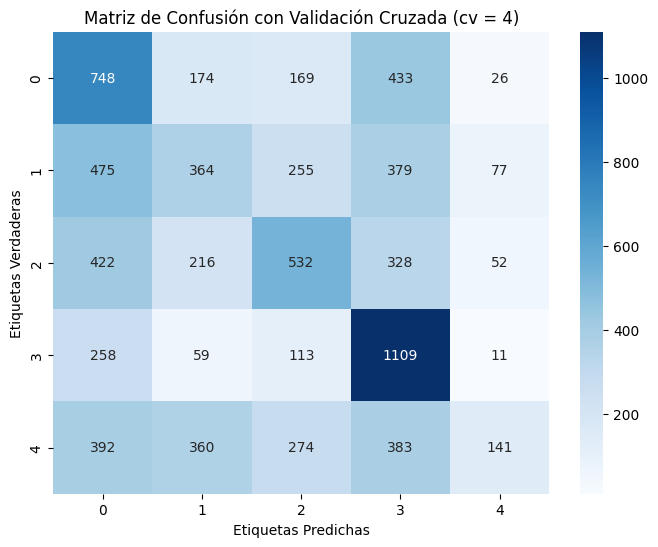

Exactitud media: 0.3734193548387097
Precisión media: 0.38260107982729863
Recall media: 0.3734193548387097
Puntuación F1 media: 0.34128785902633946
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_5.png


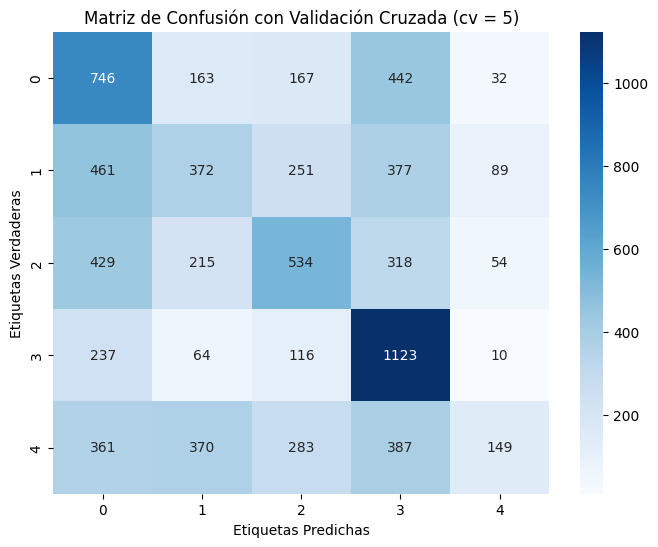

Exactitud media: 0.37729032258064515
Precisión media: 0.3827487568693683
Recall media: 0.37729032258064515
Puntuación F1 media: 0.34557753325165647
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_6.png


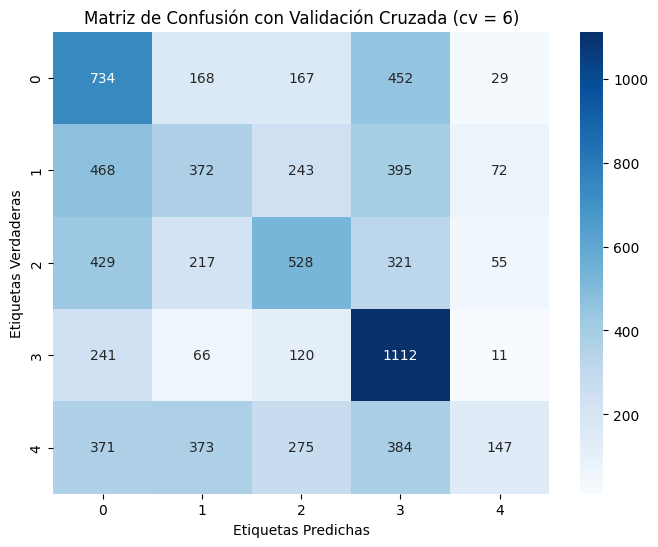

Exactitud media: 0.37329032258064515
Precisión media: 0.38398928017574147
Recall media: 0.37329032258064515
Puntuación F1 media: 0.34194866426933296
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_7.png


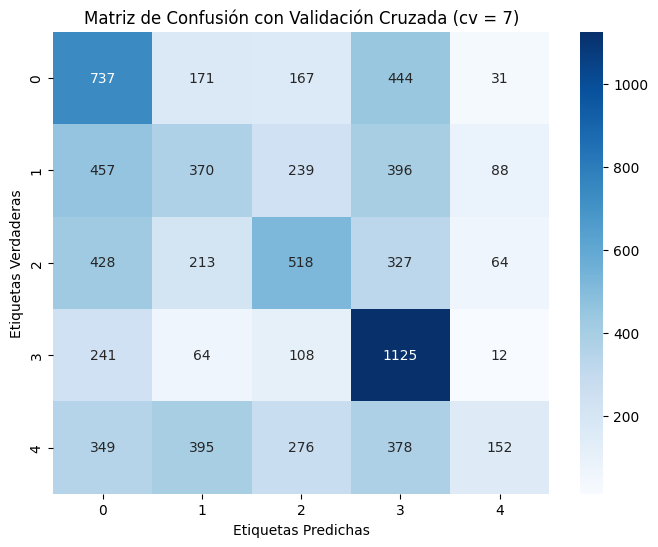

Exactitud media: 0.3744516129032258
Precisión media: 0.37872492389706564
Recall media: 0.3744516129032258
Puntuación F1 media: 0.3431114665517359
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_8.png


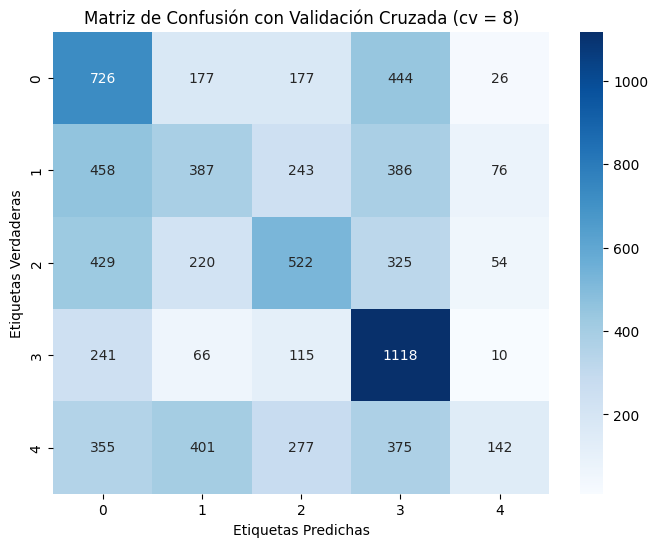

Exactitud media: 0.3735483870967742
Precisión media: 0.3825113530286943
Recall media: 0.3735483870967742
Puntuación F1 media: 0.34201743413854296
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_9.png


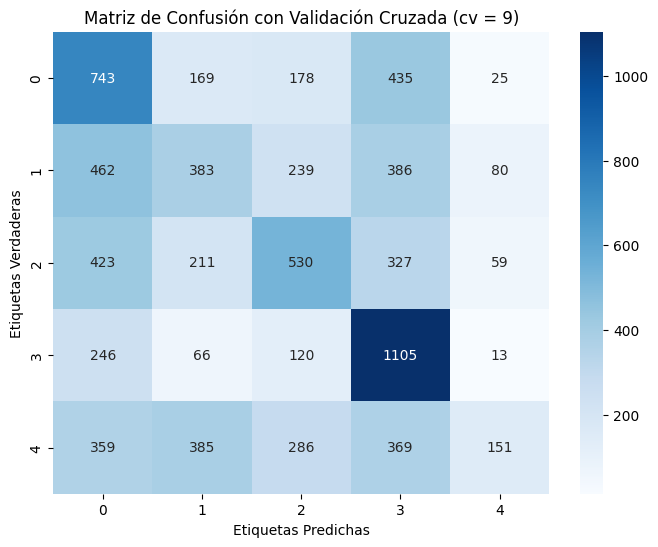

Exactitud media: 0.37574193548387097
Precisión media: 0.38434883970459177
Recall media: 0.37574193548387097
Puntuación F1 media: 0.34512307303504974
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_11_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/matriz_confusion_cv_10.png


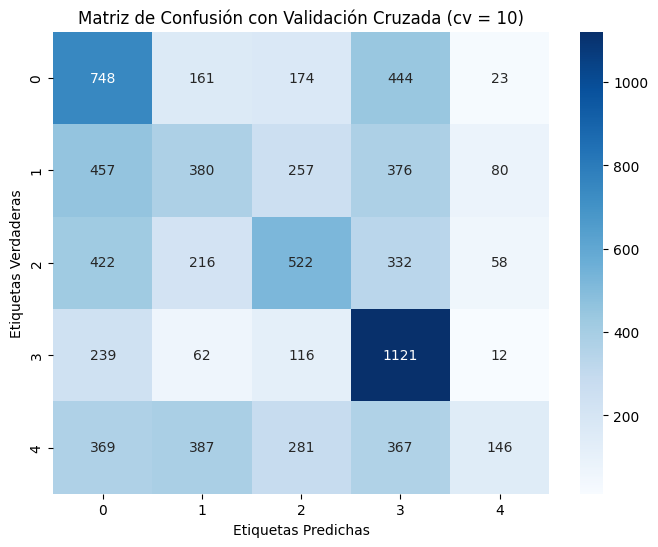

Exactitud media: 0.3763870967741936
Precisión media: 0.38374699107954086
Recall media: 0.3763870967741936
Puntuación F1 media: 0.3444646343313389
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_11_vecinos/KNN_gemini_embeddings_val_cruz.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_simple_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.1.png


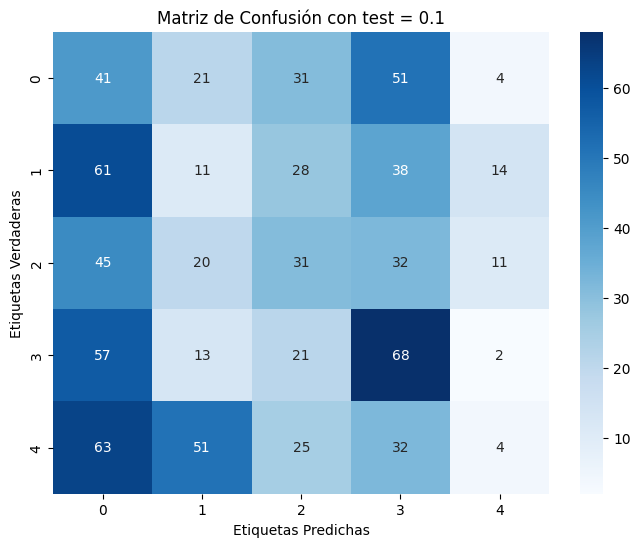

Exactitud del modelo: 0.2
Precisión del modelo: 0.17853247733112415
Recall del modelo: 0.2
Puntuación F1 del modelo: 0.17683252341531816
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.2.png


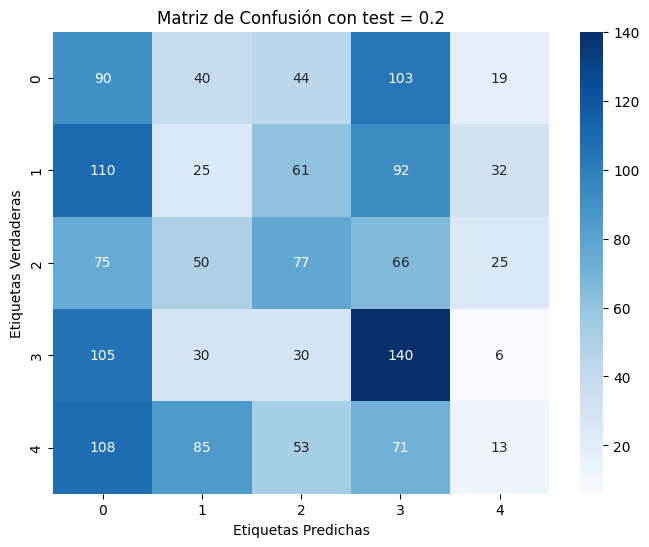

Exactitud del modelo: 0.22258064516129034
Precisión del modelo: 0.2012337284744443
Recall del modelo: 0.22258064516129034
Puntuación F1 del modelo: 0.19955832876736468
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.3.png


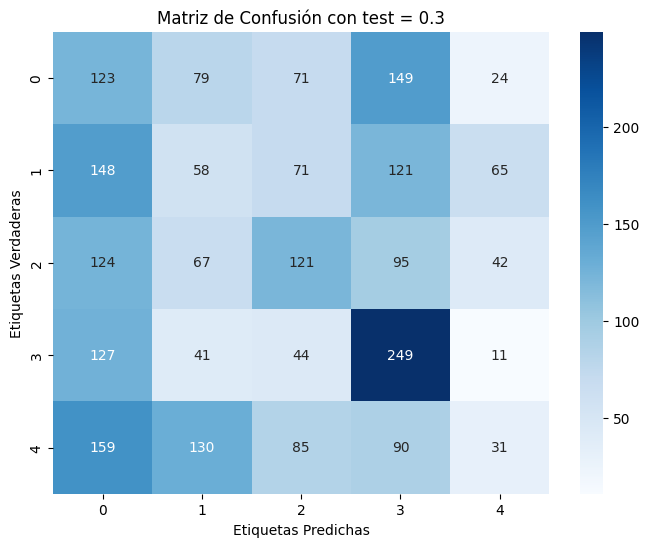

Exactitud del modelo: 0.2503225806451613
Precisión del modelo: 0.2350119244234682
Recall del modelo: 0.2503225806451613
Puntuación F1 del modelo: 0.23073744981061076
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.4.png


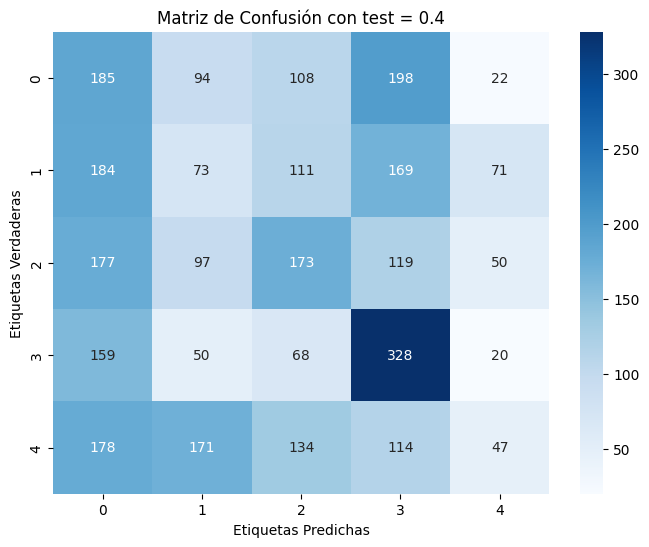

Exactitud del modelo: 0.26
Precisión del modelo: 0.24617216795238805
Recall del modelo: 0.26
Puntuación F1 del modelo: 0.23967174192446647
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.5.png


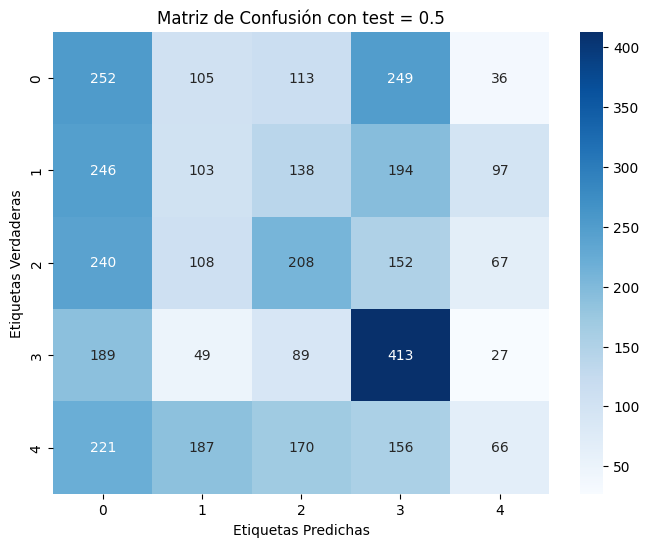

Exactitud del modelo: 0.2689032258064516
Precisión del modelo: 0.25490563729350835
Recall del modelo: 0.2689032258064516
Puntuación F1 del modelo: 0.2480274078371496
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.6.png


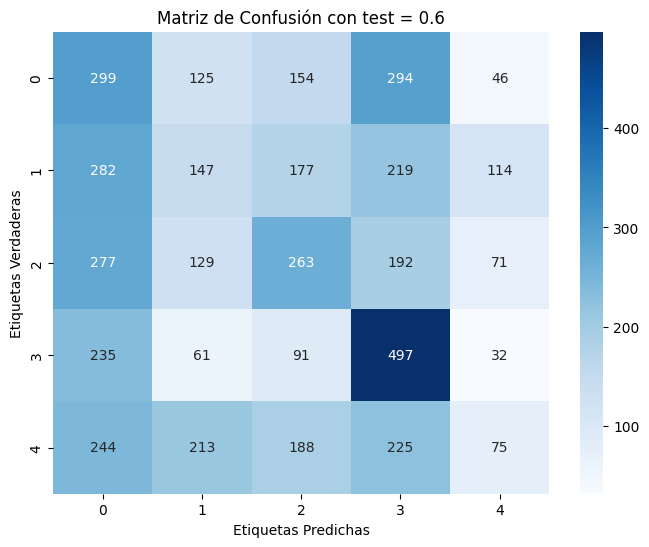

Exactitud del modelo: 0.27548387096774196
Precisión del modelo: 0.26221102952549435
Recall del modelo: 0.27548387096774196
Puntuación F1 del modelo: 0.25487604389106516
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.7.png


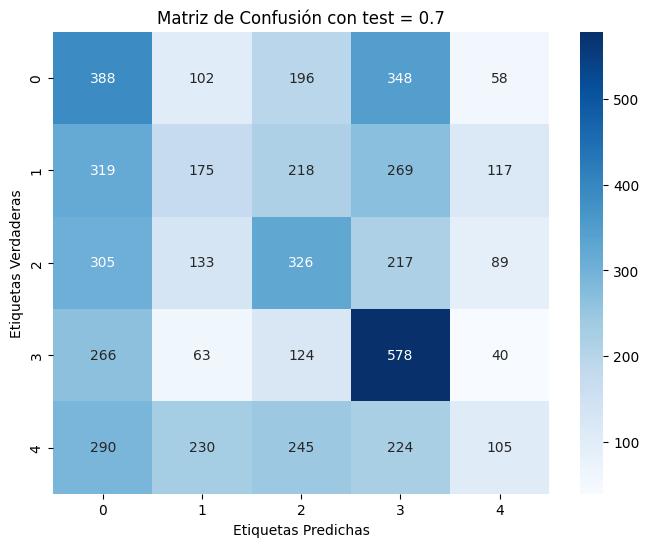

Exactitud del modelo: 0.2897695852534562
Precisión del modelo: 0.27969019842089465
Recall del modelo: 0.2897695852534562
Puntuación F1 del modelo: 0.2695539717532045
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.8.png


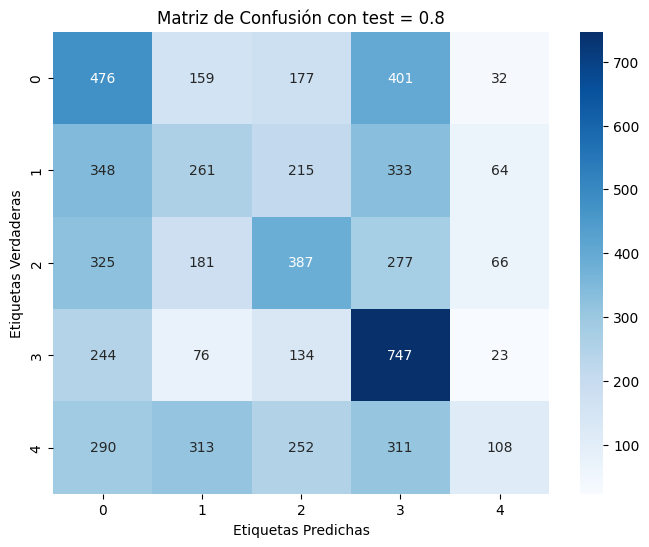

Exactitud del modelo: 0.3191935483870968
Precisión del modelo: 0.3219551168022358
Recall del modelo: 0.3191935483870968
Puntuación F1 del modelo: 0.29394126498696177
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_simple_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/matriz_confusion_test_0.9.png


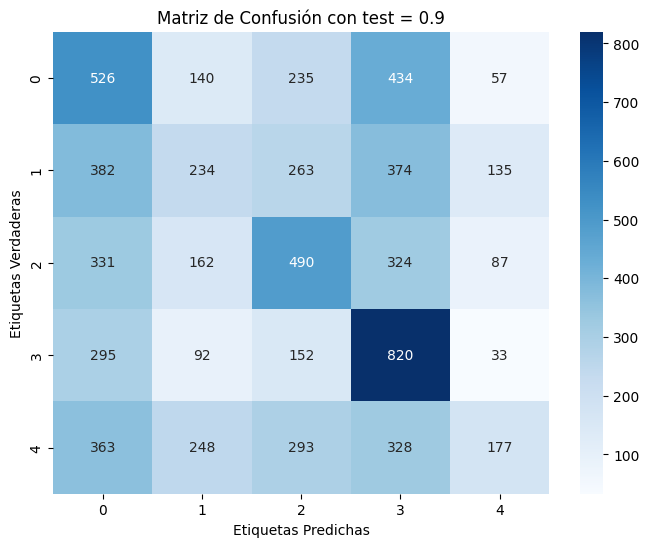

Exactitud del modelo: 0.3221505376344086
Precisión del modelo: 0.3217265692246948
Recall del modelo: 0.3221505376344086
Puntuación F1 del modelo: 0.30105959607973287
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_simple_13_vecinos/KNN_gemini_embeddings_val_simple.json
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Se creó la carpeta KNN_gemini_embeddings_val_cruz_13_vecinos en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_2.png


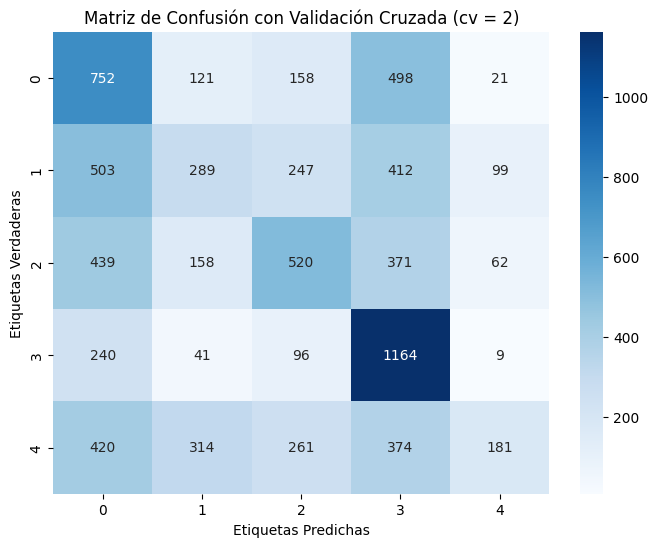

Exactitud media: 0.3749677419354839
Precisión media: 0.38753068303719956
Recall media: 0.3749677419354839
Puntuación F1 media: 0.3414784559496819
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_3.png


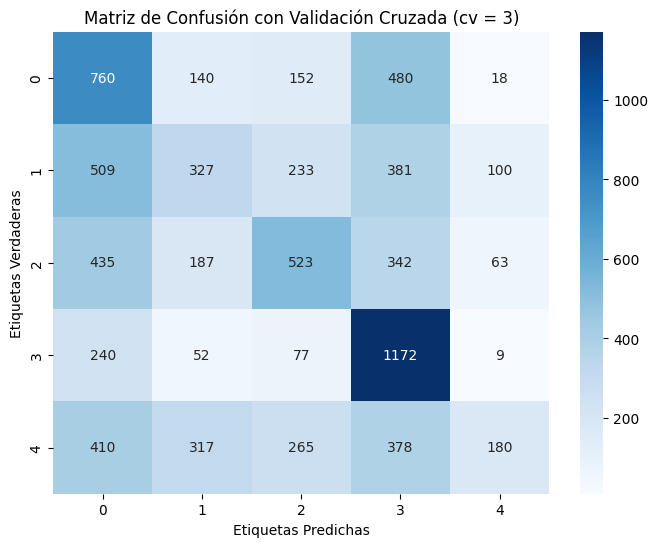

Exactitud media: 0.3821935483870968
Precisión media: 0.3946213389814161
Recall media: 0.3821935483870968
Puntuación F1 media: 0.3498659847470507
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_4.png


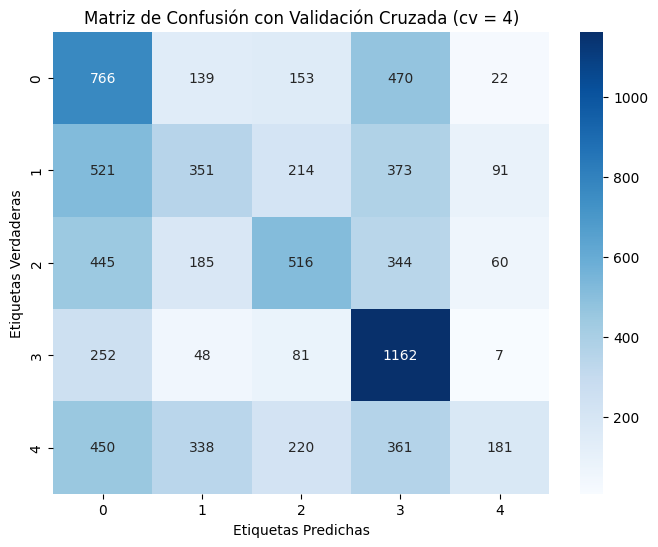

Exactitud media: 0.384
Precisión media: 0.40230128408618643
Recall media: 0.384
Puntuación F1 media: 0.3531678183048317
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_5.png


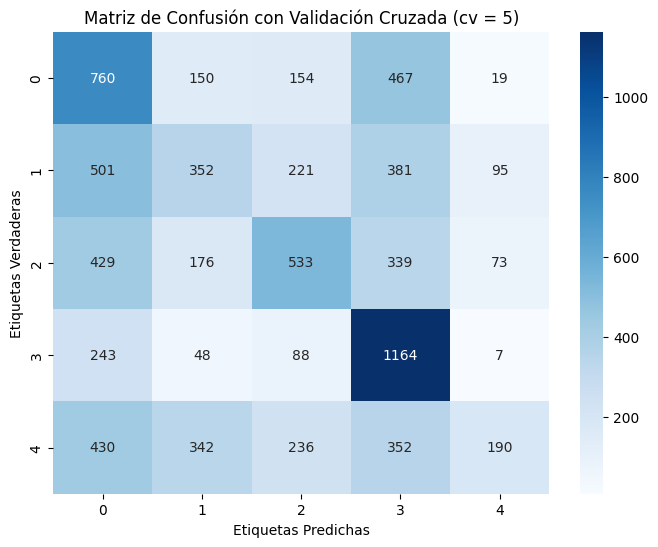

Exactitud media: 0.3869677419354839
Precisión media: 0.4018534470174645
Recall media: 0.3869677419354839
Puntuación F1 media: 0.356879237177993
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_6.png


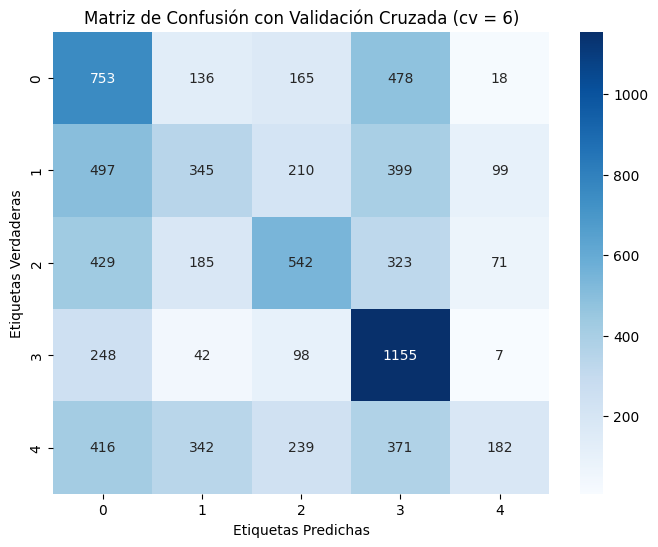

Exactitud media: 0.3841290322580645
Precisión media: 0.3977255046554172
Recall media: 0.3841290322580645
Puntuación F1 media: 0.3535885106222897
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_7.png


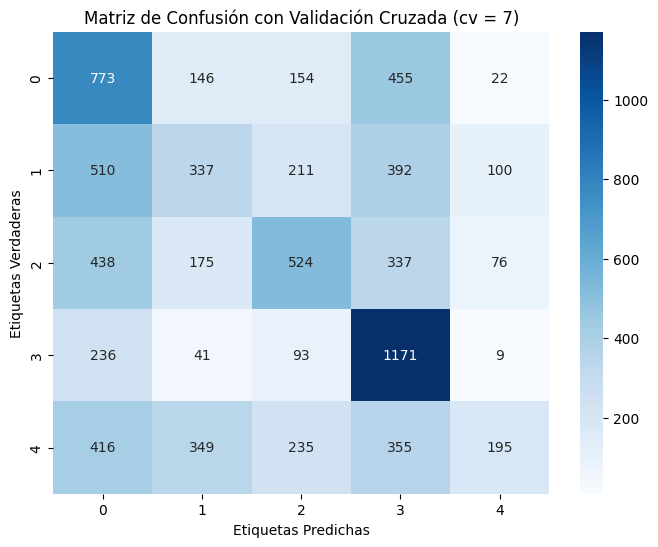

Exactitud media: 0.3870967741935484
Precisión media: 0.39901155993268406
Recall media: 0.3870967741935484
Puntuación F1 media: 0.3563652756012735
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_8.png


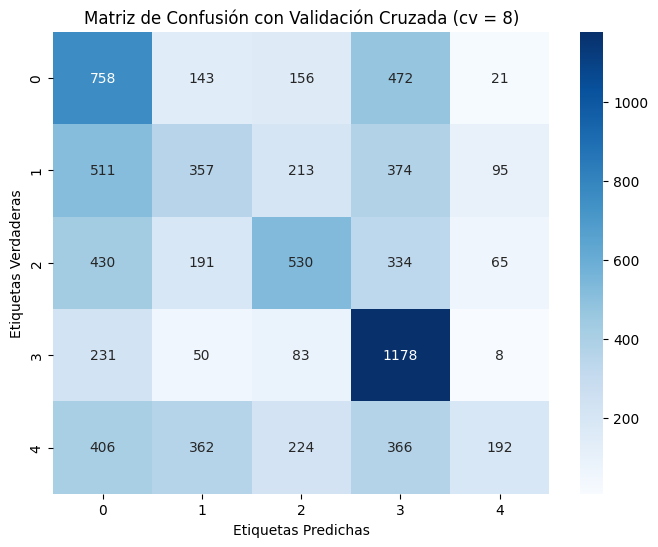

Exactitud media: 0.38903225806451613
Precisión media: 0.40480152867242636
Recall media: 0.38903225806451613
Puntuación F1 media: 0.358792759191555
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_9.png


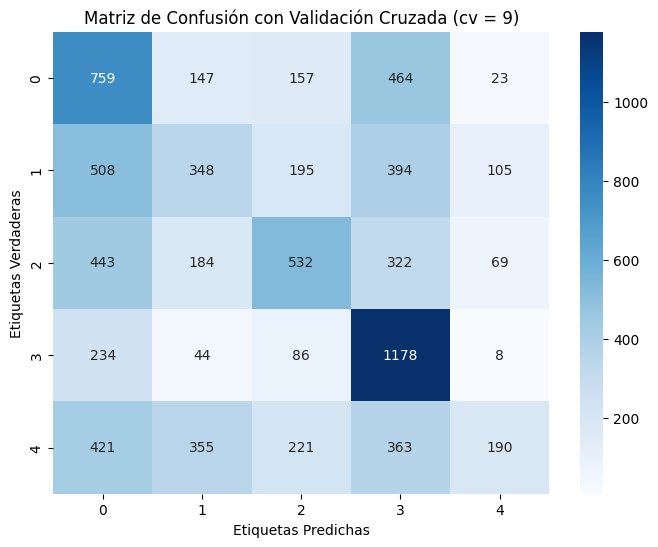

Exactitud media: 0.388
Precisión media: 0.4008750914728876
Recall media: 0.388
Puntuación F1 media: 0.3575518293994624
El directorio actual es: F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
La carpeta KNN_gemini_embeddings_val_cruz_13_vecinos ya existe en F:\nuevo_conocimiento\CODIGO DE TESIS (MUY IMPORTANTE)\Experimentos_con_modelos_basicos\LLM_embeddings_gemini
Matriz de confusión guardada en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/matriz_confusion_cv_10.png


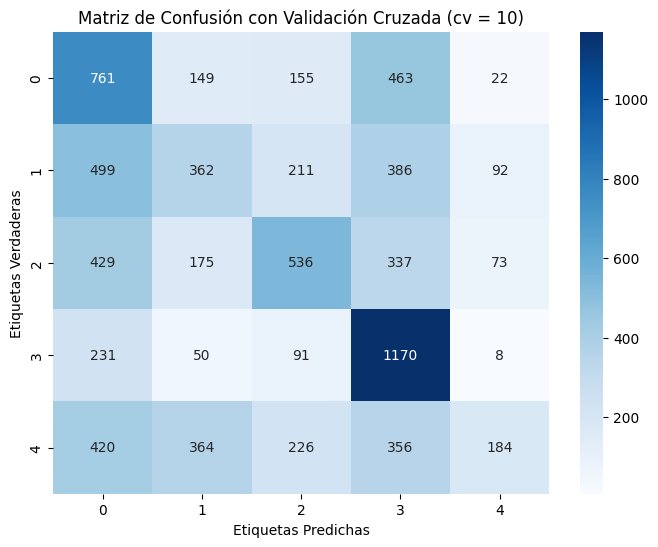

Exactitud media: 0.3887741935483871
Precisión media: 0.40218266322422114
Recall media: 0.3887741935483871
Puntuación F1 media: 0.3582841983197581
Diccionario guardado como archivo JSON en: F:/nuevo_conocimiento/CODIGO DE TESIS (MUY IMPORTANTE)/Experimentos_con_modelos_basicos/LLM_embeddings_gemini/KNN_gemini_embeddings_val_cruz_13_vecinos/KNN_gemini_embeddings_val_cruz.json


In [4]:
import json
from sklearn.model_selection import cross_val_predict

def almacenar_informacion(resultados_finales,validacion,ruta_figura_incom):
    if validacion == "simple":
        ruta_archivo = ruta_figura_incom + "/KNN_gemini_embeddings_val_simple.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)
    elif validacion == "cruz":
        ruta_archivo =  ruta_figura_incom + "/KNN_gemini_embeddings_val_cruz.json"
        with open(ruta_archivo, "w") as archivo:
            json.dump(resultados_finales, archivo)
        
        print("Diccionario guardado como archivo JSON en:", ruta_archivo)

# Inicializar una lista vacía para almacenar los valores
lista_valores = []
ruta_figura_incom = ""
# Bucle for para generar los valores en incrementos de 0.10 hasta 0.9
for i in range(1, 10):
    valor = i / 10.0
    lista_valores.append(valor)

resultados_finales_val_simple = {}
resultados_finales_val_cruz = {}


lista = [3,5,7,9,11,13]

for numero in lista: 
    experimento = 1
    for i in lista_valores:
        resultados_finales_val_simple["Experimento_LR_" + str(experimento) + "_test_" + str(i)],validacion,ruta_figura_incom = knn_classification(datos,numero,test_size_1=i)
        experimento = experimento + 1
    
    almacenar_informacion(resultados_finales_val_simple,validacion,ruta_figura_incom)
    
    lista = list(range(2, 11))
    for j in lista:
        resultados_finales_val_cruz["Experimento_LR_" + str(experimento) + "_test_" + str(j)],validacion,ruta_figura_incom = knn_classification(datos,numero,cv=j)
    
    almacenar_informacion(resultados_finales_val_cruz,validacion,ruta_figura_incom)